Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os, re, subprocess, sys, json, glob
#from molmod import *
#from molmod.io import FCHKFile
#from molmod.io.xyz import XYZReader, XYZFile
import requests
#import wts

In [2]:
plots = "/home/hagen/Masterarbeit/Arbeit/MasterThesis/img/results/"

In [3]:
plots = "plots/"

print(2)

In [4]:
2

2

get_dihed.py

In [5]:
os.getcwd()

'/home/hagen/anaconda3/bin/hemejpn'

take_properties.py

In [6]:
df = pd.DataFrame({2:["a","b"],3:[1,2]})
df  =df.set_index(2)
#df.index = df.index.str.upper()

df

,3
2,
a,1
b,2


In [7]:
if(False):
    wts.TCL-Skript()
    wts.dihedpdb()        
    wts.prepare_gaussian_logs().core()
    wts.onecsv()

    wts.read_redpot_lit()

In [8]:
dfex_1 =pd.read_csv("tables/mono.csv")
dfex_1  =dfex_1.set_index("pdb")
dfex_1 = dfex_1[[ "Elektrode","Ligand","EMv"]]
dfex_3 = pd.read_csv("tables/duplicated_moded.csv")
dfex_4 = dfex_3.drop_duplicates("PDB", keep=False)
dfex_4= dfex_4.set_index("pdb")#.rename({"PDB":"pdb"})
dfex_4 = dfex_4[[ "Elektrode","Ligand","EMv"]]

dfex_lit = dfex_1.append(dfex_4)
dfex_lit.index = dfex_lit.index.str.upper()
dfex_lit =dfex_lit.rename(columns = {"EMv":"Em_lit"})
df_axlig = pd.read_csv("tables/axligand.csv")
df_axlig = df_axlig.rename(columns={"# PDB": "pdb","ligand" : "ligand_pydish"}).set_index("pdb")
df_axlig = df_axlig[["ligand_pydish","saddling","ruffling"]]

df_calc = pd.read_csv("tables/calculated.csv")
df_calc = df_calc.drop("Unnamed: 0", axis=1).set_index("pdb")
_dihedral = pd.read_csv("tables/Dihedral.csv")
_dihedral = _dihedral.rename(columns={"Unnamed: 0":"PDB"})
_dihedral = _dihedral.set_index("PDB")

df_ruffling = pd.read_csv("tables/Ruffling.csv").rename(columns = {"Unnamed: 0":"PDB"}).set_index("PDB")
df_saddling = pd.read_csv("tables/Saddling.csv").rename(columns = {"Unnamed: 0":"PDB"}).set_index("PDB")
df_ruffling_all = df_ruffling.copy()
df_saddling_all = df_saddling.copy()
modelist1 = [i for i in df_ruffling_all.index if i in dfex_lit.index]
modelist2 = [i for i in df_saddling_all.index if i in dfex_lit.index]
if (modelist2 == modelist1):
    print("ruffling + saddling")
else:
    raise Error
df_ruffling_all = df_ruffling_all.loc[modelist1]
df_saddling_all = df_saddling_all.loc[modelist1]
    
    
    
    
    
    
    
    
dfHemetype = pd.read_csv("tables/Hemetypes.csv")
dfHemetype = dfHemetype.set_index("pdb")


pdb_calc  = list(set(df_calc.index))
pdb_lit  = list(set(dfex_lit.index))
#print(    ([i for i in pdb_calc  if not i in pdb_lit])   )

pdbavaible = [i for i in pdb_calc if i in pdb_lit]
pdbavaiblepdb_calc  = list(set(df_calc.index))
pdb_lit  = list(set(dfex_lit.index))
#print(    ([i for i in pdb_calc  if not i in pdb_lit])   )

pdbavaible = [i for i in pdb_calc if i in pdb_lit]
#pdbavaible

df_ruffling = df_ruffling.loc[pdbavaible]
df_saddling = df_saddling.loc[pdbavaible]

ruffling + saddling


# was ist mit 2gms?

# 1vb6 nochmal überlegen, gab zwei hemes mit untershcielcihen liganden

In [9]:
if not all(i in df_ruffling.index for i in pdbavaible):
    print(f"ruffling fehlt{[i for i in pdbavaible if i not in df_ruffling.index]}")
    
if not all(i in _dihedral.index for i in pdbavaible):
    print(f"Dihedral fehlt{[i for i in pdbavaible if i not in _dihedral.index]}")

if not all(i in df_saddling.index for i in pdbavaible):
    print(f"saddling fehlt{[i for i in pdbavaible if i not in df_saddling.index]}")    

In [10]:
df_ruffling.head()

,C3_SW_C1_SW_C1_WS_C3_WS,C3_SO_C1_SO_C1_OS_C3_OS,C3_WN_C1_WN_C1_NW_C3_NW,C3_NO_C1_NO_C1_ON_C3_ON
PDB,,,,
1AW3,5.321410,-5.788816,-10.645295,3.516478
1FHF,-16.866547,-11.634027,23.562327,-13.419490
1CCC,-8.061759,24.512677,8.360383,-28.276804
1A6G,7.471468,-1.022543,-2.678883,-9.072572
1A6K,14.519887,-1.292667,-7.636986,-10.146471


In [11]:
[i for i in df_ruffling_all.index if i not in dfex_lit.index]

[]

In [141]:
df_calc[[i for i in df_calc.columns if "homo" in i or "lumo" in i or "spin" in i]]

,spin,homo,lumo
pdb,,,
1CXC,6,-0.27754,-0.19258
1F1F,1,-0.18147,-0.07042
1JP9,5,-0.17150,-0.07304
1C75,5,-0.10133,-0.07202
2GSM,6,-0.29996,-0.18661
...,...,...,...
1CCK,2,-0.29381,-0.24367
2V07,5,-0.16952,-0.07361
1CCK,6,-0.28417,-0.21770


In [145]:
df_work[[i for i in df_work.columns if "homo" in i and "nbo" in i]]

,homo_1_nbo,homo_2_nbo,homo_5_nbo,homo_6_nbo
pdb,,,,
1AW3,-0.17366,-0.29314,-0.17767,-0.29342
1FHF,-0.16090,-0.26514,-0.17172,-0.27867
1CCC,-0.18310,-0.29238,-0.17605,-0.29428
1A6G,-0.16762,-0.29842,-0.15907,-0.27928
1A6K,-0.17131,-0.27617,-0.17266,-0.29908
1CCE,-0.18567,-0.30302,-0.16582,-0.27761
1EBT,-0.18528,-0.30256,-0.17188,-0.29902
1CCK,-0.18189,-0.29381,-0.17502,-0.28417
1FJ0,-0.13578,-0.28387,-0.14093,-0.28339


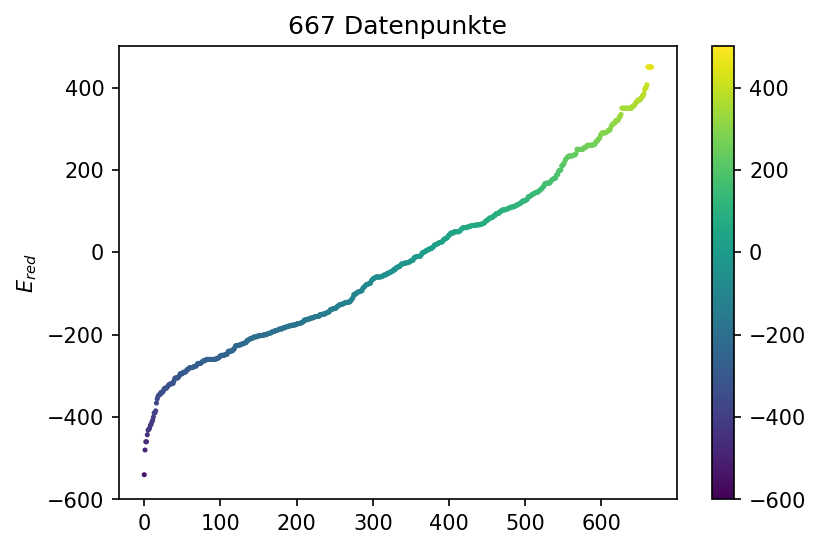

In [12]:
dff = pd.read_csv("tables/RedoxPotential.csv")
def f(strs):
    if type(strs) == str:
        try:
            return float(strs.split("+-")[0])
        except:
            return None
    elif(type(strs) == float):
        return float

plt.figure(dpi=150)

lis = [f(i) for i in dff['EM'] if type(f(i)) == float]
lis.sort()
plt.ylabel("$E_{red}$")
#plt.xlabel("order")
plt.scatter(range(len(lis)), lis,s =2,c=lis, vmin = -600, vmax = 500)
plt.ylim([-600,500])
plt.colorbar()

dff = pd.DataFrame({"Em_lit":lis})
plt.title(f"{len(lis)} Datenpunkte")
plt.savefig(f"{plots}order_large.png" )

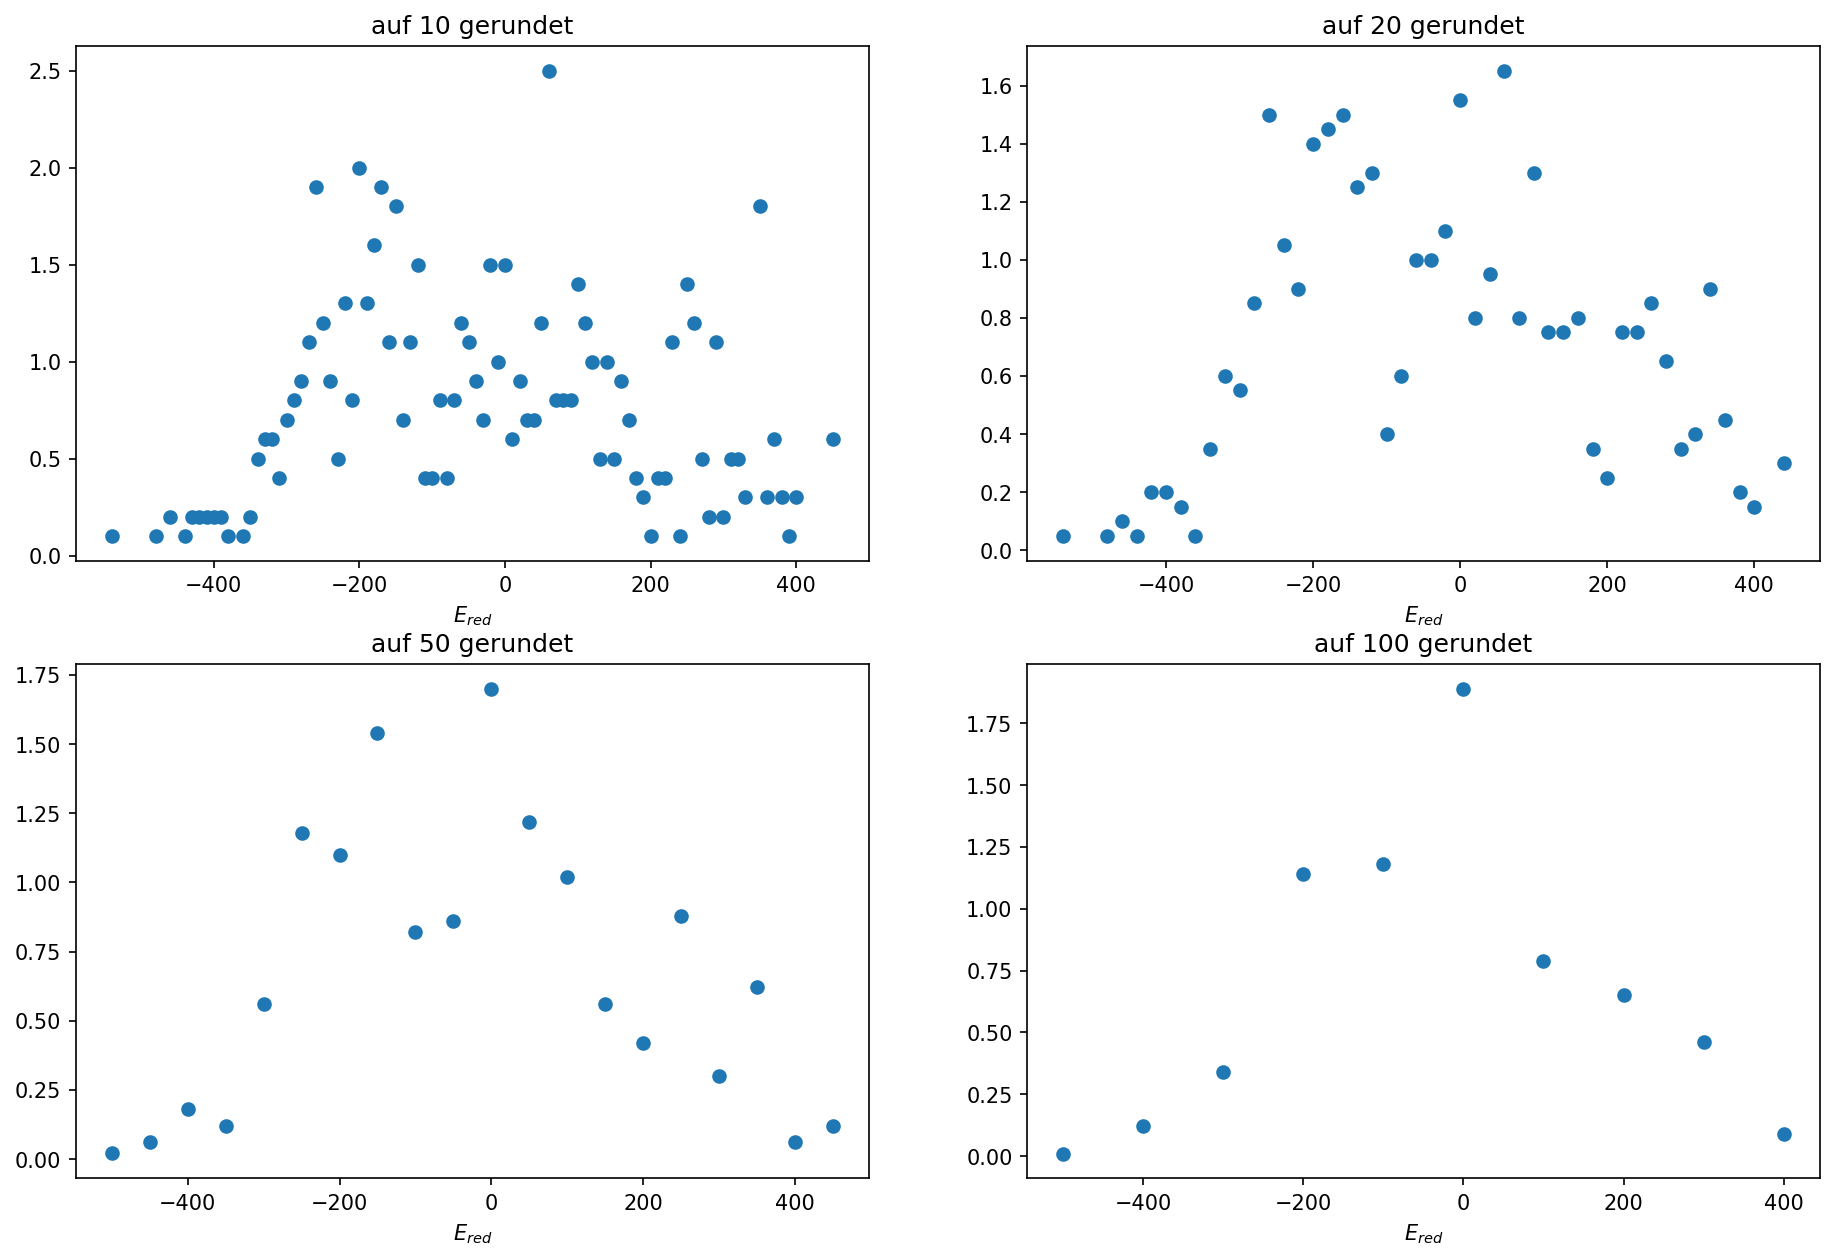

In [13]:
plt.figure(num=1,figsize=(15,10),dpi =150)

plt.subplot(2,2,1)
count = 10
dff[count]=[int(i/count)*count for i in dff["Em_lit"]]
plt.scatter(dff[count].value_counts().index, dff[count].value_counts().values/count)
plt.title(f"auf {count} gerundet")
plt.xlabel("$E_{red}$")

plt.subplot(2,2,2)
count = 20
dff[count]=[int(i/count)*count for i in dff["Em_lit"]]
plt.scatter(dff[count].value_counts().index, dff[count].value_counts().values/count)
plt.title(f"auf {count} gerundet")
plt.xlabel("$E_{red}$")

plt.subplot(2,2,3)
count = 50
dff[count]=[int(i/count)*count for i in dff["Em_lit"]]
plt.scatter(dff[count].value_counts().index, dff[count].value_counts().values/count)
plt.title(f"auf {count} gerundet")
plt.xlabel("$E_{red}$")

plt.subplot(2,2,4)
count = 100
dff[count]=[int(i/count)*count for i in dff["Em_lit"]]
plt.scatter(dff[count].value_counts().index, dff[count].value_counts().values/count)
plt.title(f"auf {count} gerundet")
plt.xlabel("$E_{red}$")

plt.savefig(f"{plots}gaussrm.png")

In [14]:

#plt.scatter(dff["20"].value_counts().index, dff["20"].value_counts().values)
#plt.scatter(dff["100"].value_counts().index, dff["100"].value_counts().values)

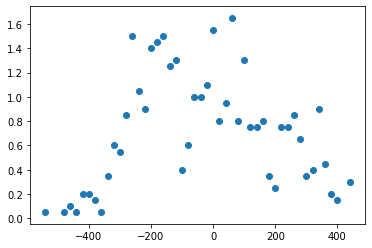

In [15]:
count = 20
dff[count]=[int(i/count)*count for i in dff["Em_lit"]]

plt.scatter(dff[count].value_counts().index, dff[count].value_counts().values/count)


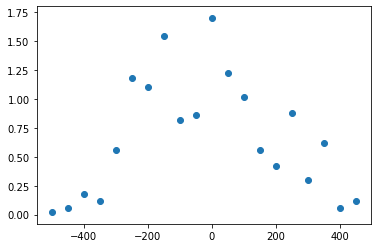

In [16]:
count = 50
dff[count]=[int(i/count)*count for i in dff["Em_lit"]]

plt.scatter(dff[count].value_counts().index, dff[count].value_counts().values/count)


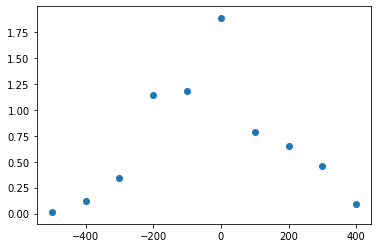

In [17]:
count = 100
dff[count]=[int(i/count)*count for i in dff["Em_lit"]]

plt.scatter(dff[count].value_counts().index, dff[count].value_counts().values/count)


In [18]:
df_mode = pd.DataFrame({"Em_lit":[dfex_lit.loc[i]["Em_lit"] for i in modelist1]}, index = modelist1)
df_mode["type"] = dfHemetype.loc[[i for i in df_mode.index]]["type"]

/home/hagen/anaconda3/envs/KLeich/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  


In [19]:
df_mode["ruffling_mean"] = df_ruffling_all.mean(axis = 1)
df_mode["ruffling_max"] = df_ruffling_all.max(axis = 1)
df_mode["saddling_mean"] = df_saddling_all.mean(axis = 1)
df_mode["saddling_max"] = df_saddling_all.max(axis = 1)

In [20]:
df_mode["saddling_max2"] = [180 - abs(i) if abs(i)>90 else abs(i) for i in df_mode["saddling_max"]]

In [21]:
from sklearn.model_selection import train_test_split

X = df_mode[["ruffling_mean", "saddling_mean"]]
X = df_mode[["ruffling_mean"]]
Y = df_mode[["Em_lit"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42, test_size = 0.25)

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


pf = PolynomialFeatures(degree = 2, include_bias = False) # include_bias macht noch einen wert 1 
pf.fit(X_train) # möglicherweise nicht nötig


X_train_transformed = pf.transform(X_train)[:, [0, 1]]
X_test_transformed = pf.transform(X_test)[:, [0, 1]]
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_transformed, y_train)

print(model.score(X_test_transformed, y_test))

-0.03404975054691839


In [22]:
df_modeHB = df_mode[df_mode["type"] == "Heme B" ]
df_modeNB = df_mode[df_mode["type"] != "Heme B" ]

In [23]:
df_modeHB

,Em_lit,type,ruffling_mean,ruffling_max,saddling_mean,saddling_max,saddling_max2
3CCX,-181.1,Heme B,-0.644245,17.627942,-4.078440,5.025763,5.025763
6U97,179.3,Heme B,1.564556,14.284085,6.825322,8.550658,8.550658
1CCE,-127.0,Heme B,0.416999,24.739251,-7.074727,9.457818,9.457818
1DRM,68.0,Heme B,1.248518,16.548711,-92.815087,-4.130716,4.130716
4K8F,-320.0,Heme B,0.309098,13.835859,-6.882209,7.751604,7.751604
2OYY,-540.0,Heme B,-0.674529,15.054889,6.229047,12.517760,12.517760
451C,270.0,Heme B,0.389032,7.781707,10.162352,11.877396,11.877396
1A6K,50.0,Heme B,-1.139059,14.519887,1.232260,179.205138,0.794862
1CYO,-10.0,Heme B,1.905175,14.163253,-7.162143,-2.076368,2.076368
1AW3,-102.0,Heme B,-1.899056,5.321410,-4.161817,-2.160916,2.160916


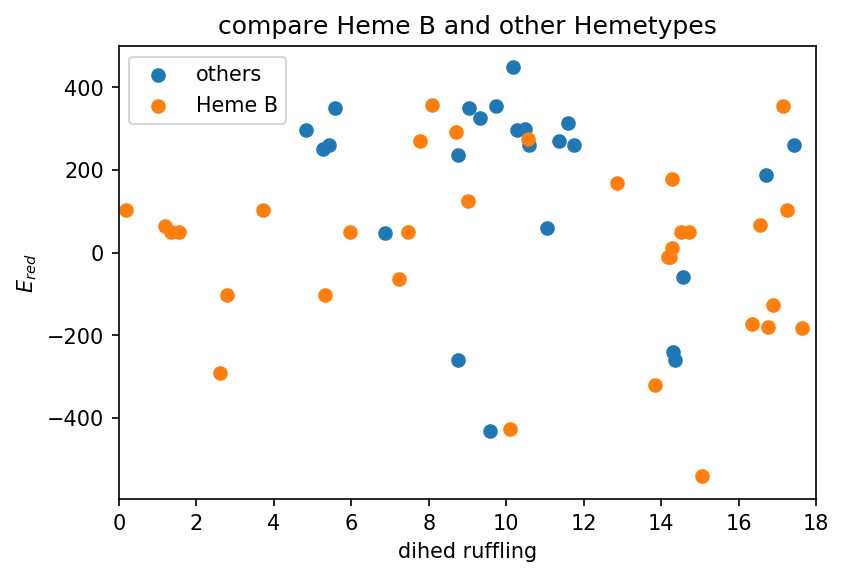

In [24]:
fig = plt.figure(dpi=150)
plt.scatter(df_modeNB[df_modeNB["ruffling_max"]<20]["ruffling_max"],df_modeNB[df_modeNB["ruffling_max"]<20]["Em_lit"],label="others")
plt.scatter(df_modeHB[df_modeHB["ruffling_max"]<20]["ruffling_max"],df_modeHB[df_modeHB["ruffling_max"]<20]["Em_lit"],label  ="Heme B")
plt.xlabel("dihed ruffling")
plt.ylabel("$E_{red}$")
plt.title("compare Heme B and other Hemetypes")
plt.legend()
plt.xlim([0,18])
plt.savefig(f"{plots}compareHemeB.png")

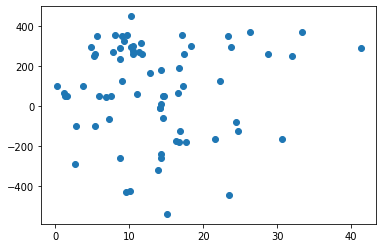

In [25]:
plt.scatter(df_mode["ruffling_max"] , df_mode["Em_lit"])


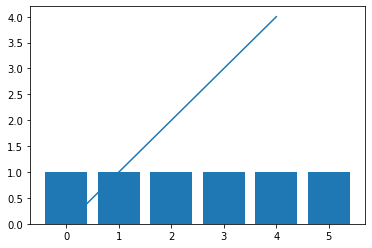

In [26]:
x1= np.arange(5)
x2= np.arange(6)
y1=np.arange(5)
y2 = np.ones(6)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x1,y1)
ax.bar(x2,y2)
plt.show()

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18] [103.0, -45.82, 199.5, 142.5, 126.28571428571429, 170.72727272727272, 214.2, -60.870000000000005, -126.88333333333334, 167.38]


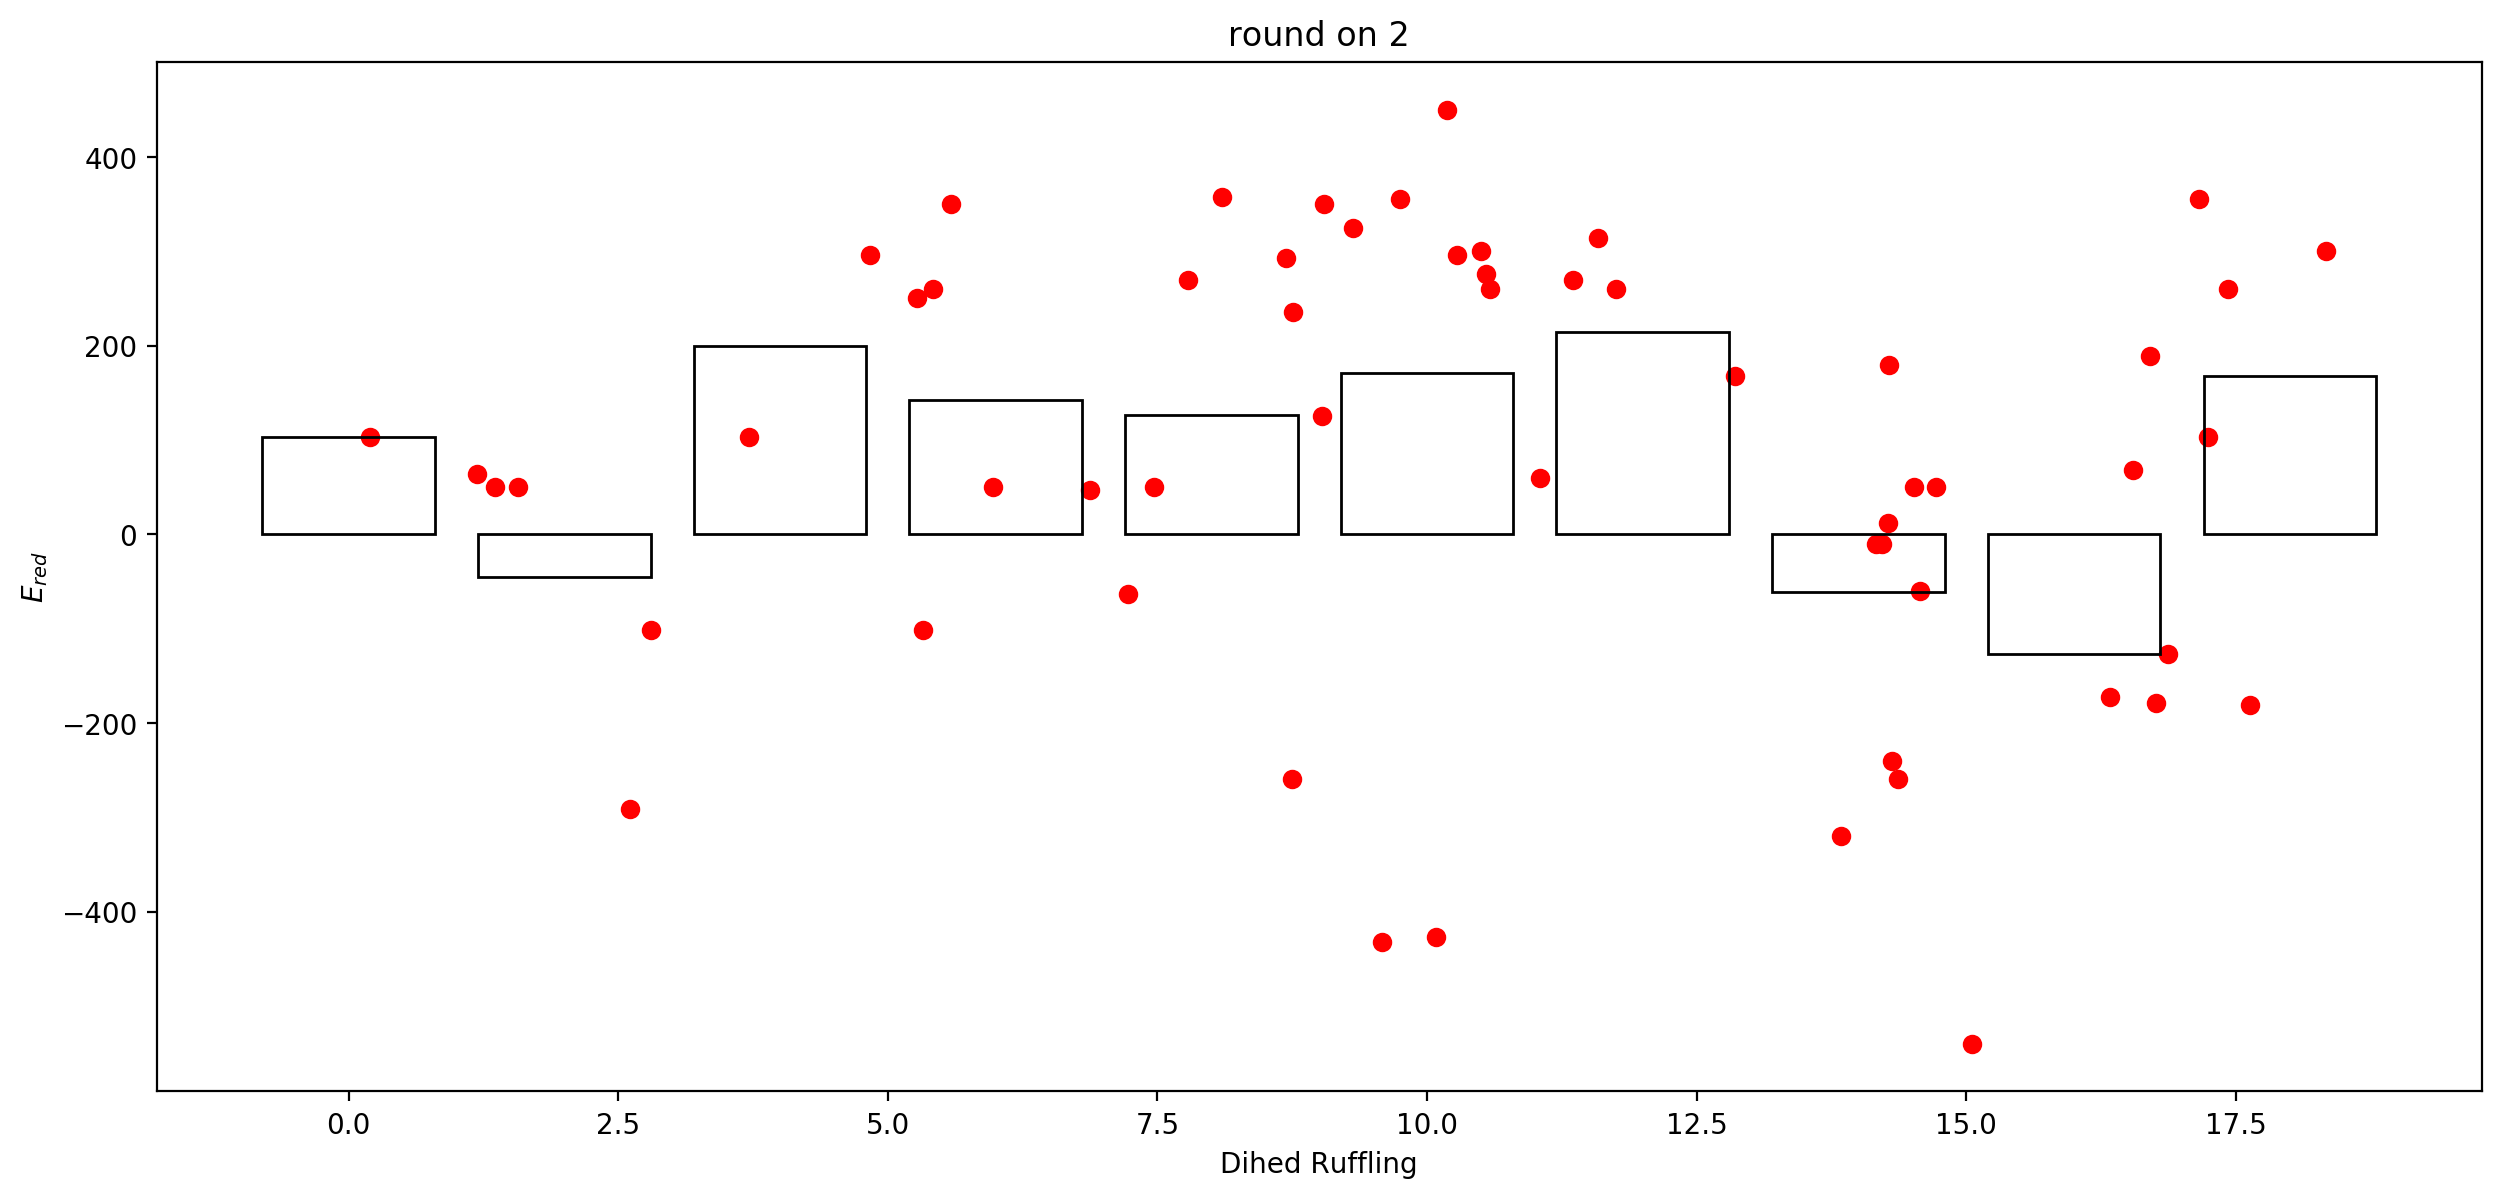

In [27]:
def rounddata(i):
    global rounding 
 

    return int(i/rounding+0.5)*rounding

dfbar = df_mode[["ruffling_max","Em_lit"]].copy()
dfbar = df_mode[df_mode["ruffling_max"]<20][["ruffling_max","Em_lit"]].copy()
fig = plt.figure(dpi =200,figsize = [15,15])
roundlist = [1,2,3,4,5,6,1.5,2.5]


rounding =2

dfbar[rounding] = [rounddata(i) for i in dfbar["ruffling_max"]]
#for i in dfbar["rufround"]:
    #print(dfbar[dfbar["rufround"] ==i]["Em_lit"].mean())

ruflist = list(set(dfbar[rounding]))
ruflist.sort()
emlist = [dfbar[dfbar[rounding] ==i]["Em_lit"].mean() for i in ruflist]
print(ruflist, emlist)


ax = fig.add_subplot(211)

ax.bar(ruflist, emlist, width = rounding*0.8,fill = False)
ax.scatter(dfbar["ruffling_max"] , dfbar["Em_lit"],c="red")
fig.titel="Dihed Ruffling"
ax.set_xlabel("Dihed Ruffling")
ax.set_ylabel("$E_{red}$")
ax.set_title(f"round on {rounding}")

plt.show()

#plt.bar(ruflist, emlist, width = rounding*0.8)

[-6, -3, -1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 13, 14, 15, 16] [-10.0, 68.0, -56.0, -25.5, -50.3, -196.5, -172.6, -134.0, -129.55, -19.75, -240.0, -150.66666666666666, 26.150000000000006, 270.0, 74.25, 333.0, 293.0, 234.25]


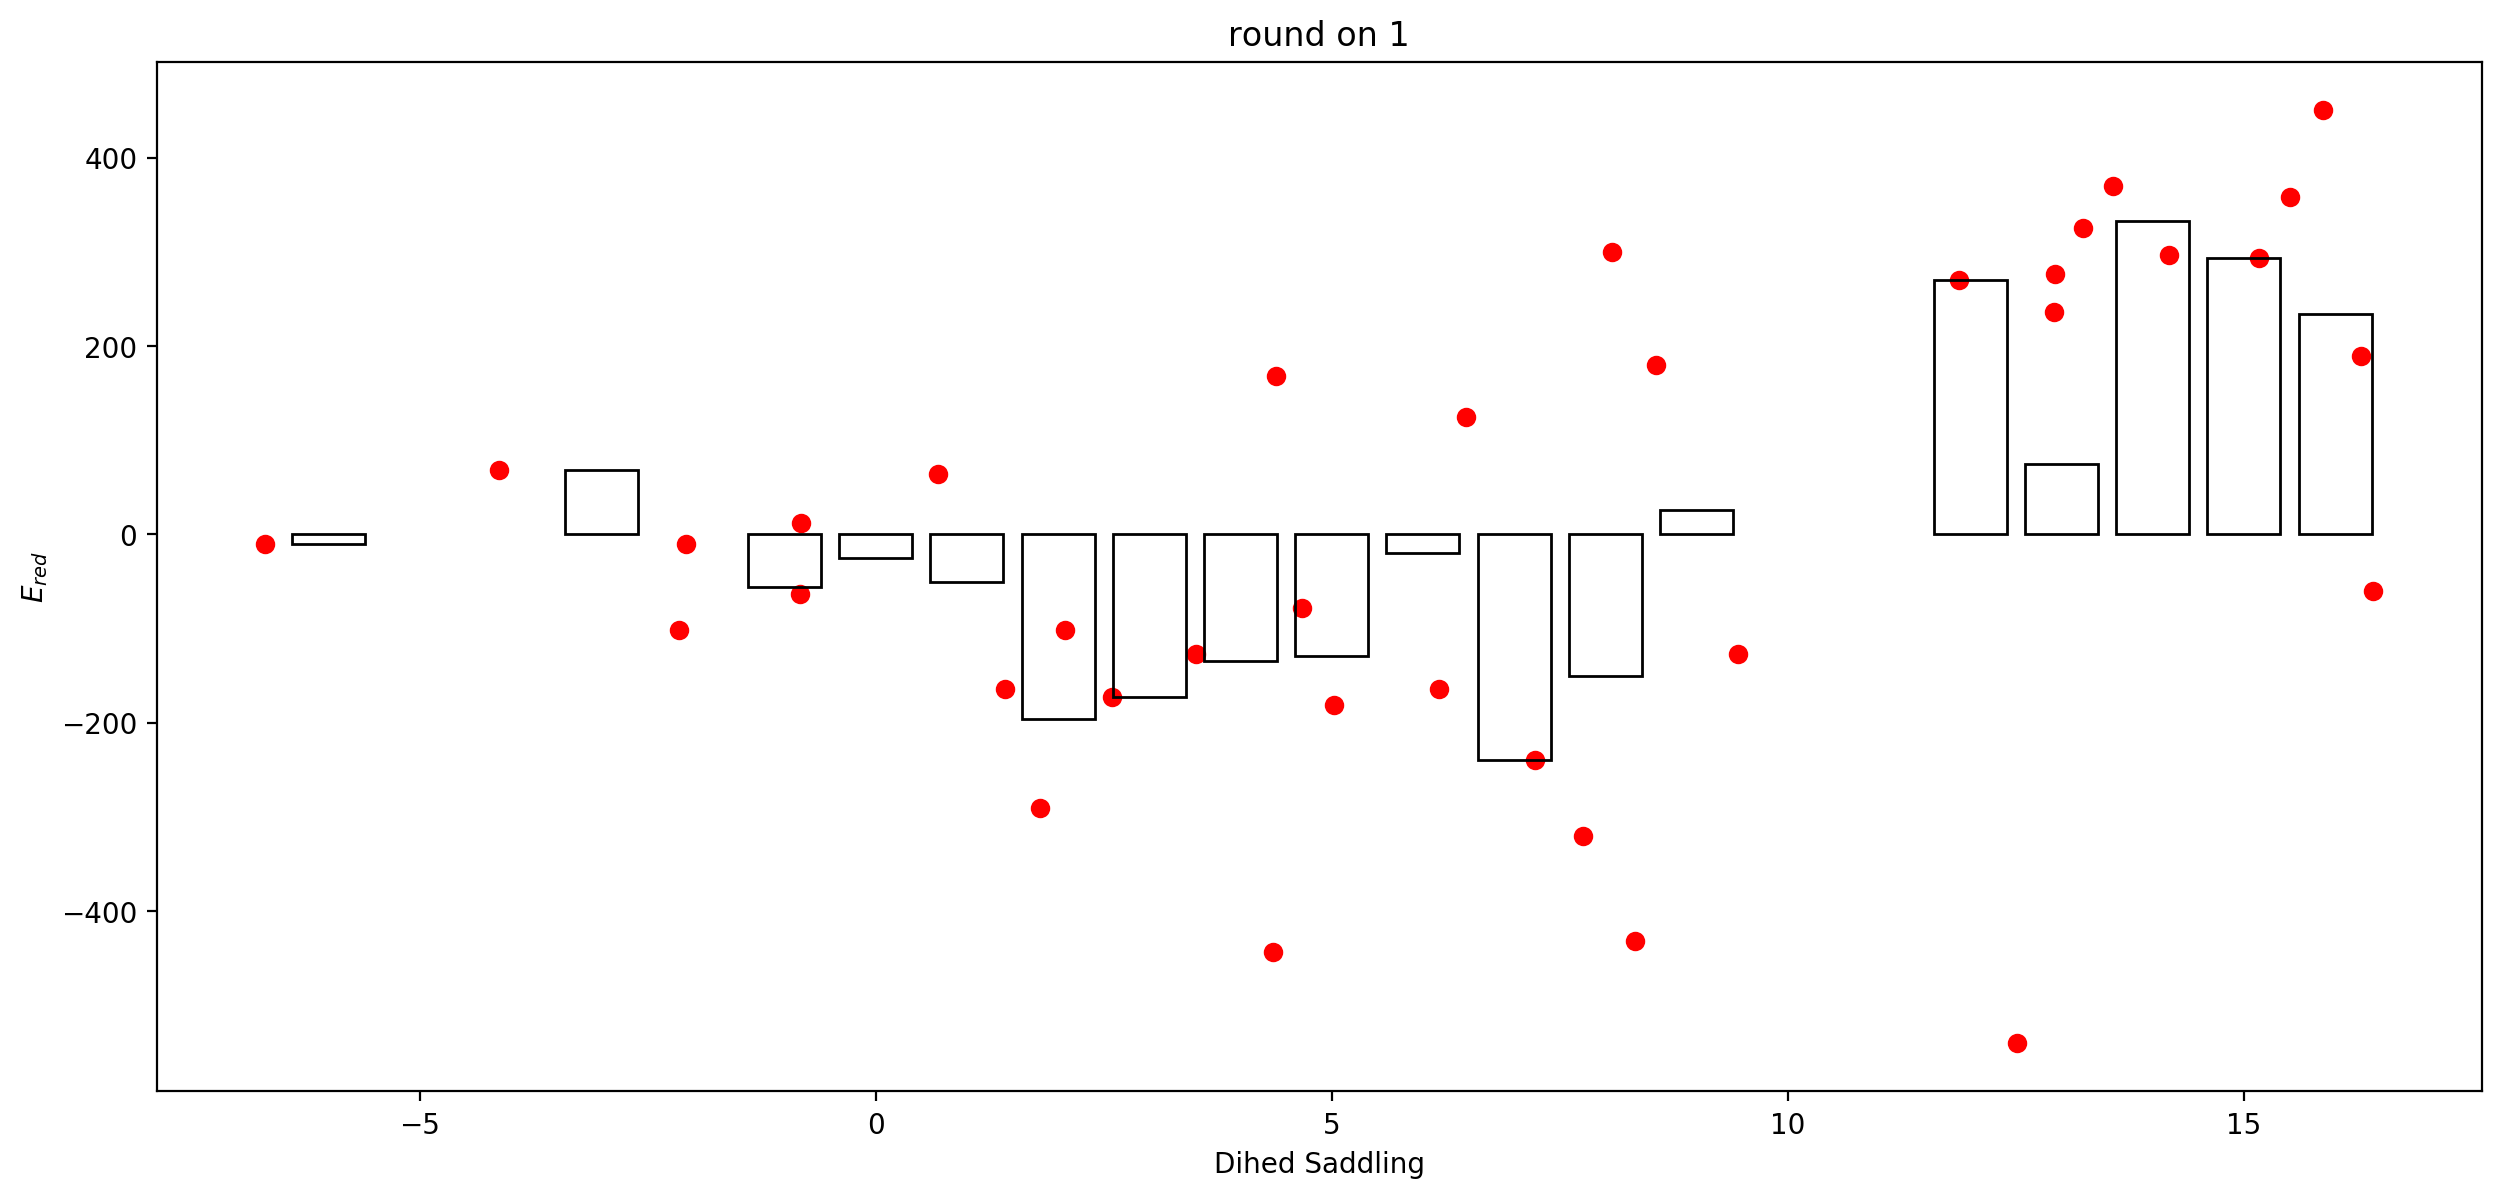

In [28]:
def rounddata(i):
    global rounding 
 

    return int(i/rounding+0.5)*rounding

dfbar = df_mode[["saddling_max","Em_lit"]].copy()
dfbar = df_mode[df_mode["saddling_max"]<20][["saddling_max","Em_lit"]].copy()
fig = plt.figure(dpi =200,figsize = [15,15])
roundlist = [1,2,3,4,5,6,1.5,2.5]


rounding =1

dfbar[rounding] = [rounddata(i) for i in dfbar["saddling_max"]]
#for i in dfbar["rufround"]:
    #print(dfbar[dfbar["rufround"] ==i]["Em_lit"].mean())

ruflist = list(set(dfbar[rounding]))
ruflist.sort()
emlist = [dfbar[dfbar[rounding] ==i]["Em_lit"].mean() for i in ruflist]
print(ruflist, emlist)


ax = fig.add_subplot(211)

ax.bar(ruflist, emlist, width = rounding*0.8,fill = False)
ax.scatter(dfbar["saddling_max"] , dfbar["Em_lit"],c="red")
fig.titel="Dihed Ruffling"
ax.set_xlabel("Dihed Saddling")
ax.set_ylabel("$E_{red}$")
ax.set_title(f"round on {rounding}")

plt.show()

#plt.bar(ruflist, emlist, width = rounding*0.8)

[-4, -2, 0, 2, 4, 6, 8, 10, 12, 14, 16] [-10.0, 68.0, -19.82, -182.525, -120.0, -73.53333333333333, -102.54, -127.0, 60.5, 330.3333333333333, 246.0]


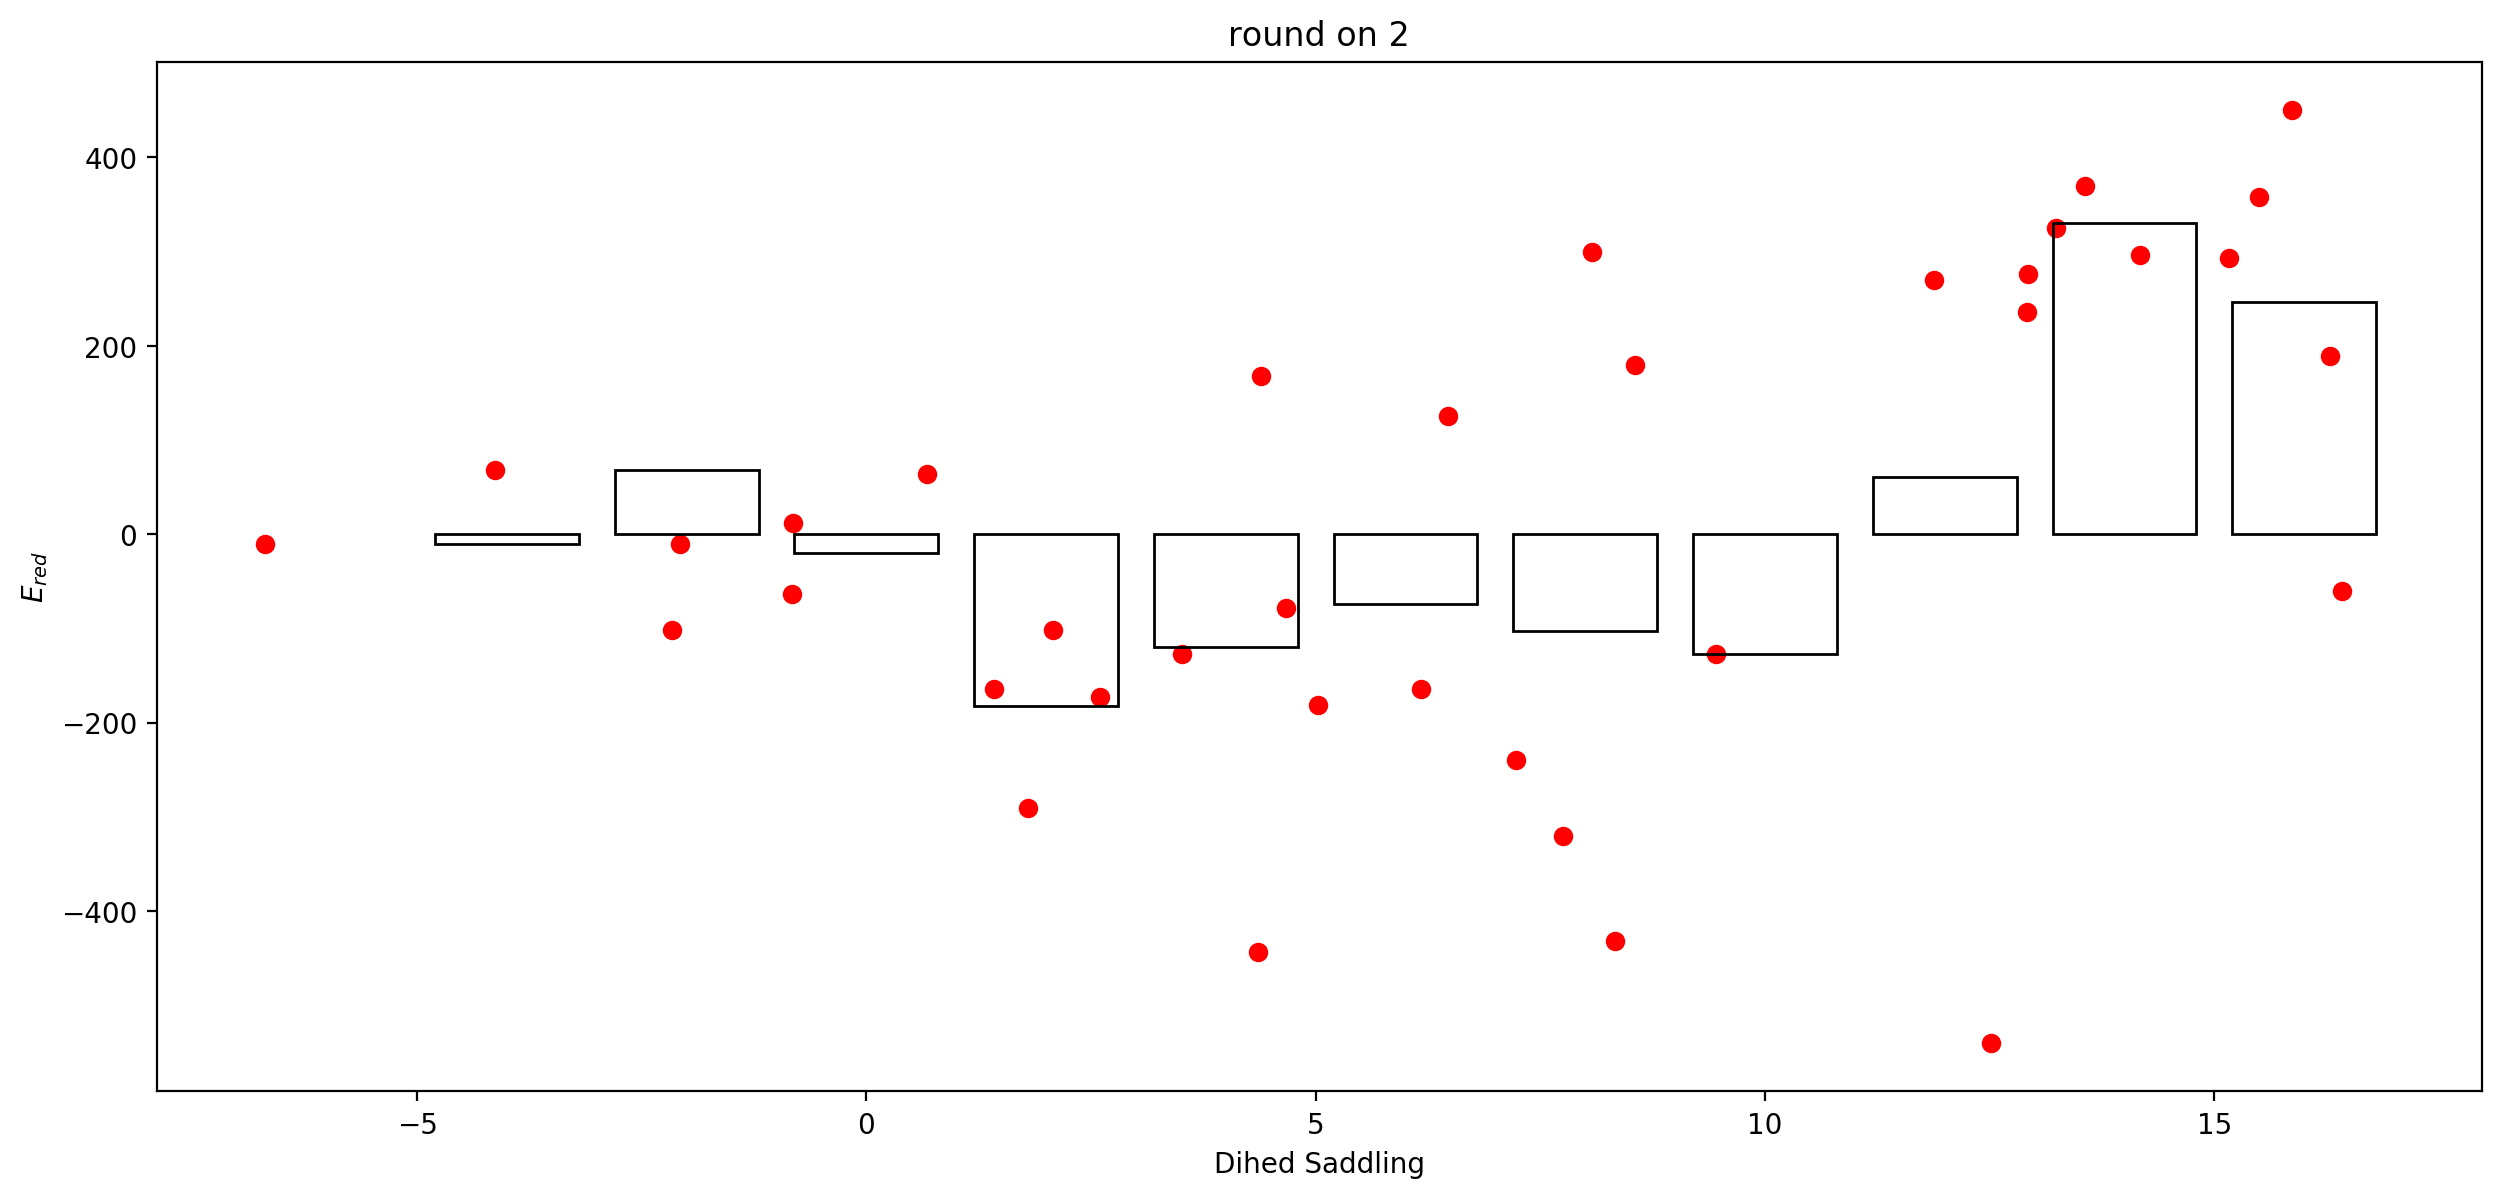

In [29]:
def rounddata(i):
    global rounding 
 

    return int(i/rounding+0.5)*rounding

dfbar = df_mode[["saddling_max","Em_lit"]].copy()
dfbar = df_mode[df_mode["saddling_max"]<20][["saddling_max","Em_lit"]].copy()
fig = plt.figure(dpi =200,figsize = [15,15])
roundlist = [1,2,3,4,5,6,1.5,2.5]


rounding =2

dfbar[rounding] = [rounddata(i) for i in dfbar["saddling_max"]]
#for i in dfbar["rufround"]:
    #print(dfbar[dfbar["rufround"] ==i]["Em_lit"].mean())

ruflist = list(set(dfbar[rounding]))
ruflist.sort()
emlist = [dfbar[dfbar[rounding] ==i]["Em_lit"].mean() for i in ruflist]
print(ruflist, emlist)


ax = fig.add_subplot(211)

ax.bar(ruflist, emlist, width = rounding*0.8,fill = False)
ax.scatter(dfbar["saddling_max"] , dfbar["Em_lit"],c="red")
fig.titel="Dihed Ruffling"
ax.set_xlabel("Dihed Saddling")
ax.set_ylabel("$E_{red}$")
ax.set_title(f"round on {rounding}")

plt.show()

#plt.bar(ruflist, emlist, width = rounding*0.8)

[5, 6, 7, 8, 9, 12, 13, 14, 15, 16, 22] [-181.1, -19.75, -49.0, -150.66666666666666, 26.150000000000006, 270.0, 74.25, 333.0, 293.0, 234.25, 0.0]


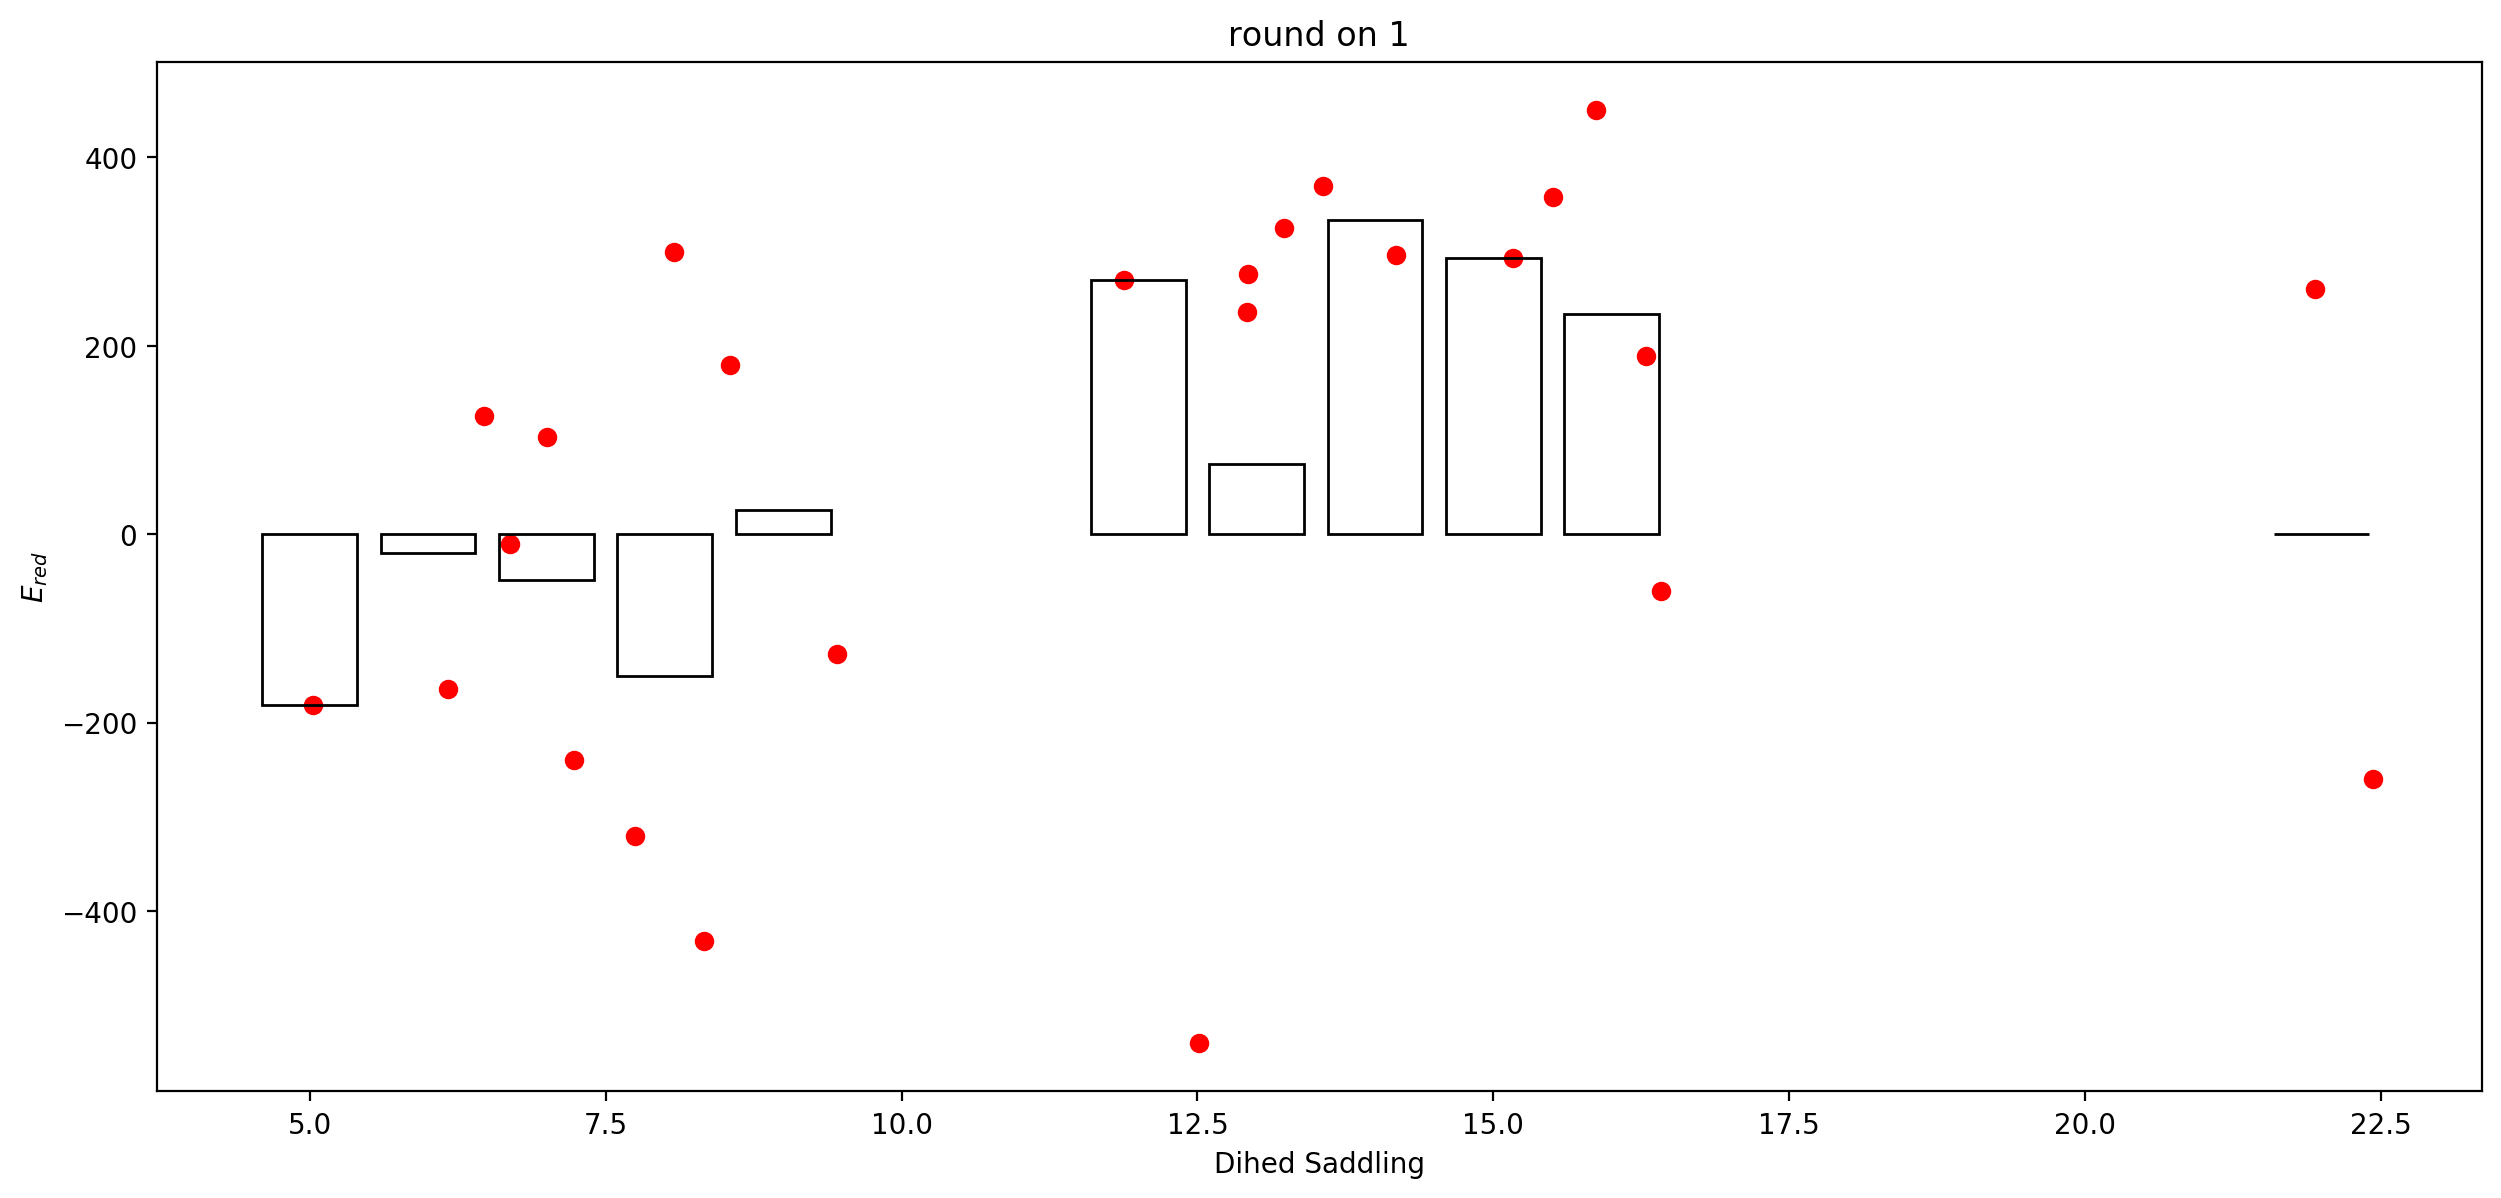

In [30]:
def rounddata(i):
    global rounding 
 

    return int(i/rounding+0.5)*rounding

dfbar = df_mode[["saddling_max2","Em_lit"]].copy()
dfbar = df_mode[df_mode["saddling_max2"]>5][["saddling_max2","Em_lit"]].copy()
fig = plt.figure(dpi =200,figsize = [15,15])
roundlist = [1,2,3,4,5,6,1.5,2.5]


rounding =1

dfbar[rounding] = [rounddata(i) for i in dfbar["saddling_max2"]]
#for i in dfbar["rufround"]:
    #print(dfbar[dfbar["rufround"] ==i]["Em_lit"].mean())

ruflist = list(set(dfbar[rounding]))
ruflist.sort()
emlist = [dfbar[dfbar[rounding] ==i]["Em_lit"].mean() for i in ruflist]
print(ruflist, emlist)


ax = fig.add_subplot(211)

ax.bar(ruflist, emlist, width = rounding*0.8,fill = False)
ax.scatter(dfbar["saddling_max2"] , dfbar["Em_lit"],c="red")
fig.titel="Dihed Ruffling"
ax.set_xlabel("Dihed Saddling")
ax.set_ylabel("$E_{red}$")
ax.set_title(f"round on {rounding}")

plt.show()

#plt.bar(ruflist, emlist, width = rounding*0.8)

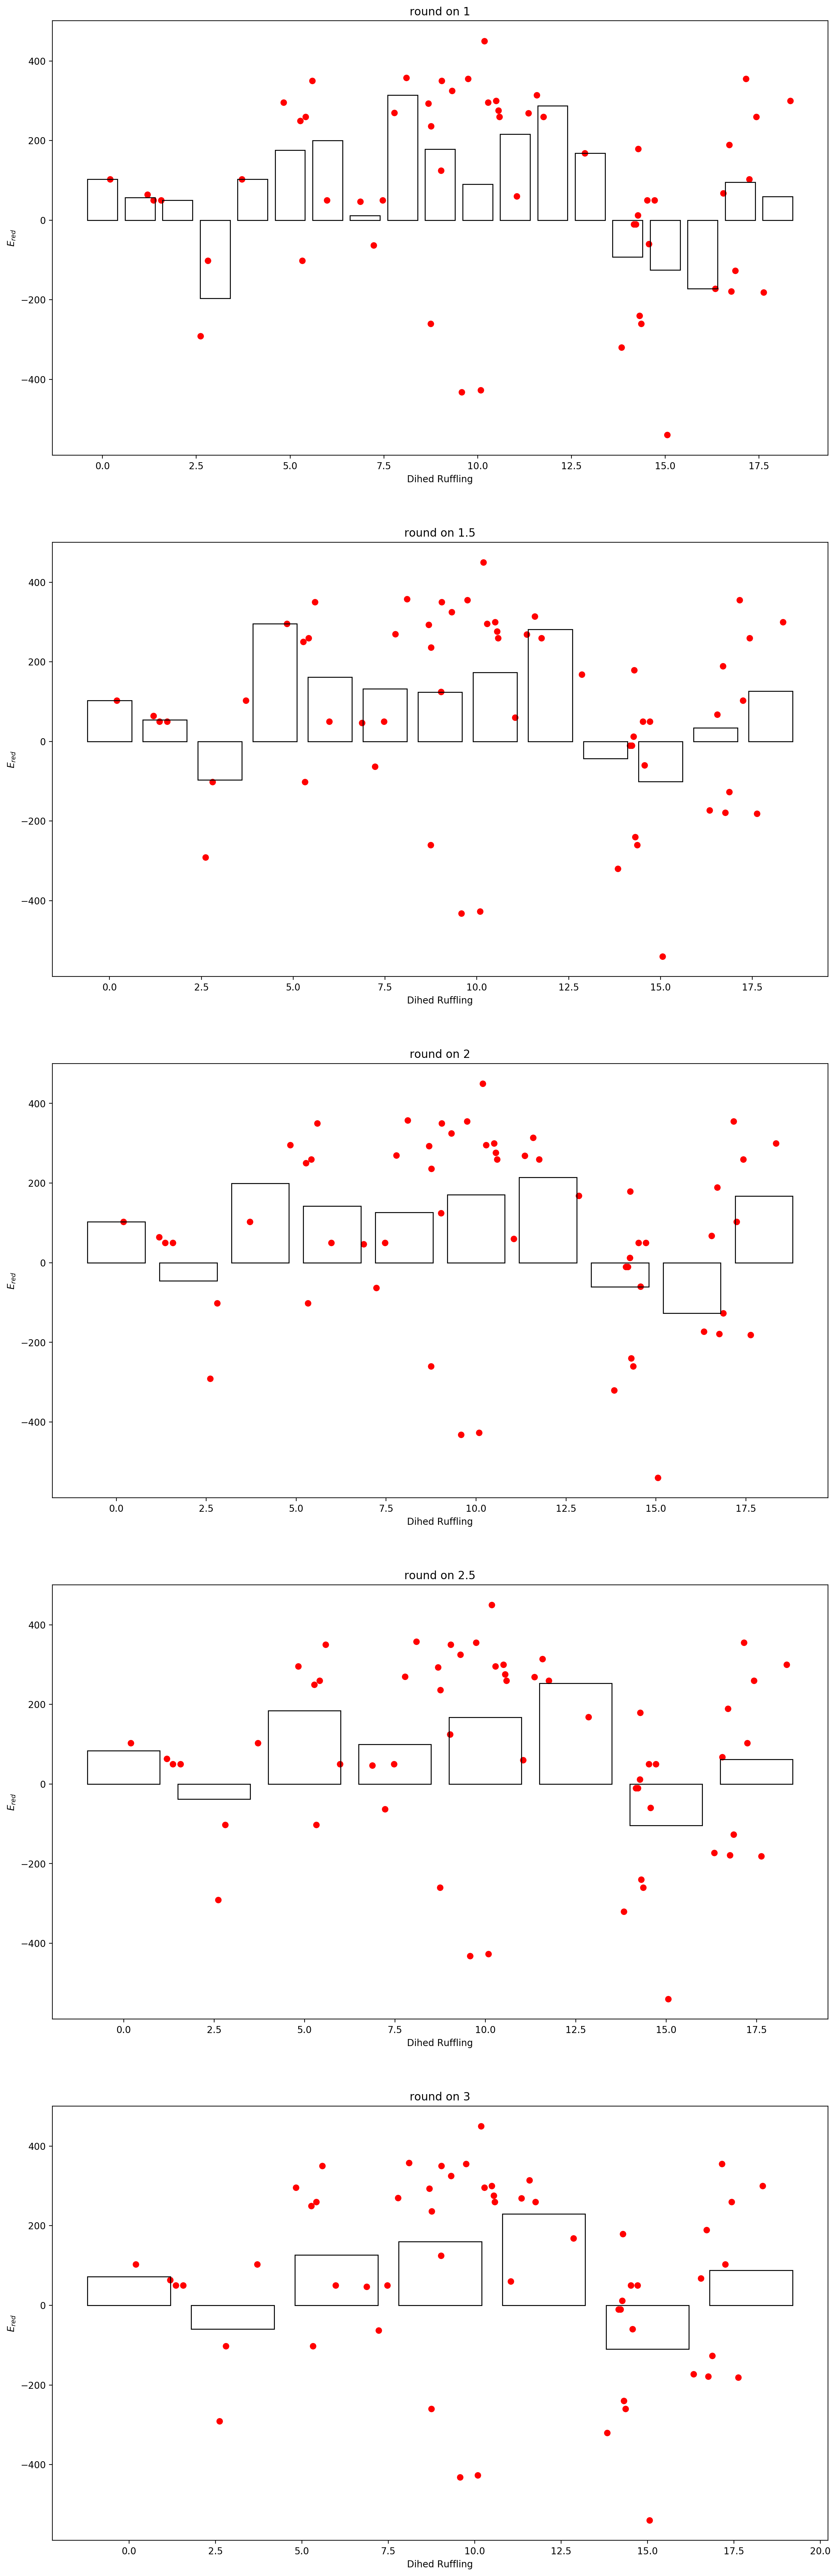

In [31]:
def rounddata(i):
    global rounding 
 

    return int(i/rounding+0.5)*rounding

dfbar = df_mode[["ruffling_max","Em_lit"]].copy()
dfbar = df_mode[df_mode["ruffling_max"]<20][["ruffling_max","Em_lit"]].copy()
roundlist = [1,1.5,2,2.5,3]

fig = plt.figure(dpi =200,figsize = [15,10*len(roundlist)])

for r in roundlist:
    rounding =r

    dfbar[rounding] = [rounddata(i) for i in dfbar["ruffling_max"]]
    #for i in dfbar["rufround"]:
        #print(dfbar[dfbar["rufround"] ==i]["Em_lit"].mean())

    ruflist = list(set(dfbar[rounding]))
    ruflist.sort()
    emlist = [dfbar[dfbar[rounding] ==i]["Em_lit"].mean() for i in ruflist]
    #print(ruflist, emlist)


    ax = fig.add_subplot(len(roundlist),1,roundlist.index(r)+1)

    ax.bar(ruflist, emlist, width = rounding*0.8,fill = False)
    ax.scatter(dfbar["ruffling_max"] , dfbar["Em_lit"],c="red")
    fig.titel="Dihed Ruffling"
    ax.set_xlabel("Dihed Ruffling")
    ax.set_ylabel("$E_{red}$")
    ax.set_title(f"round on {rounding}")

plt.show()

    #plt.bar(ruflist, emlist, width = rounding*0.8)

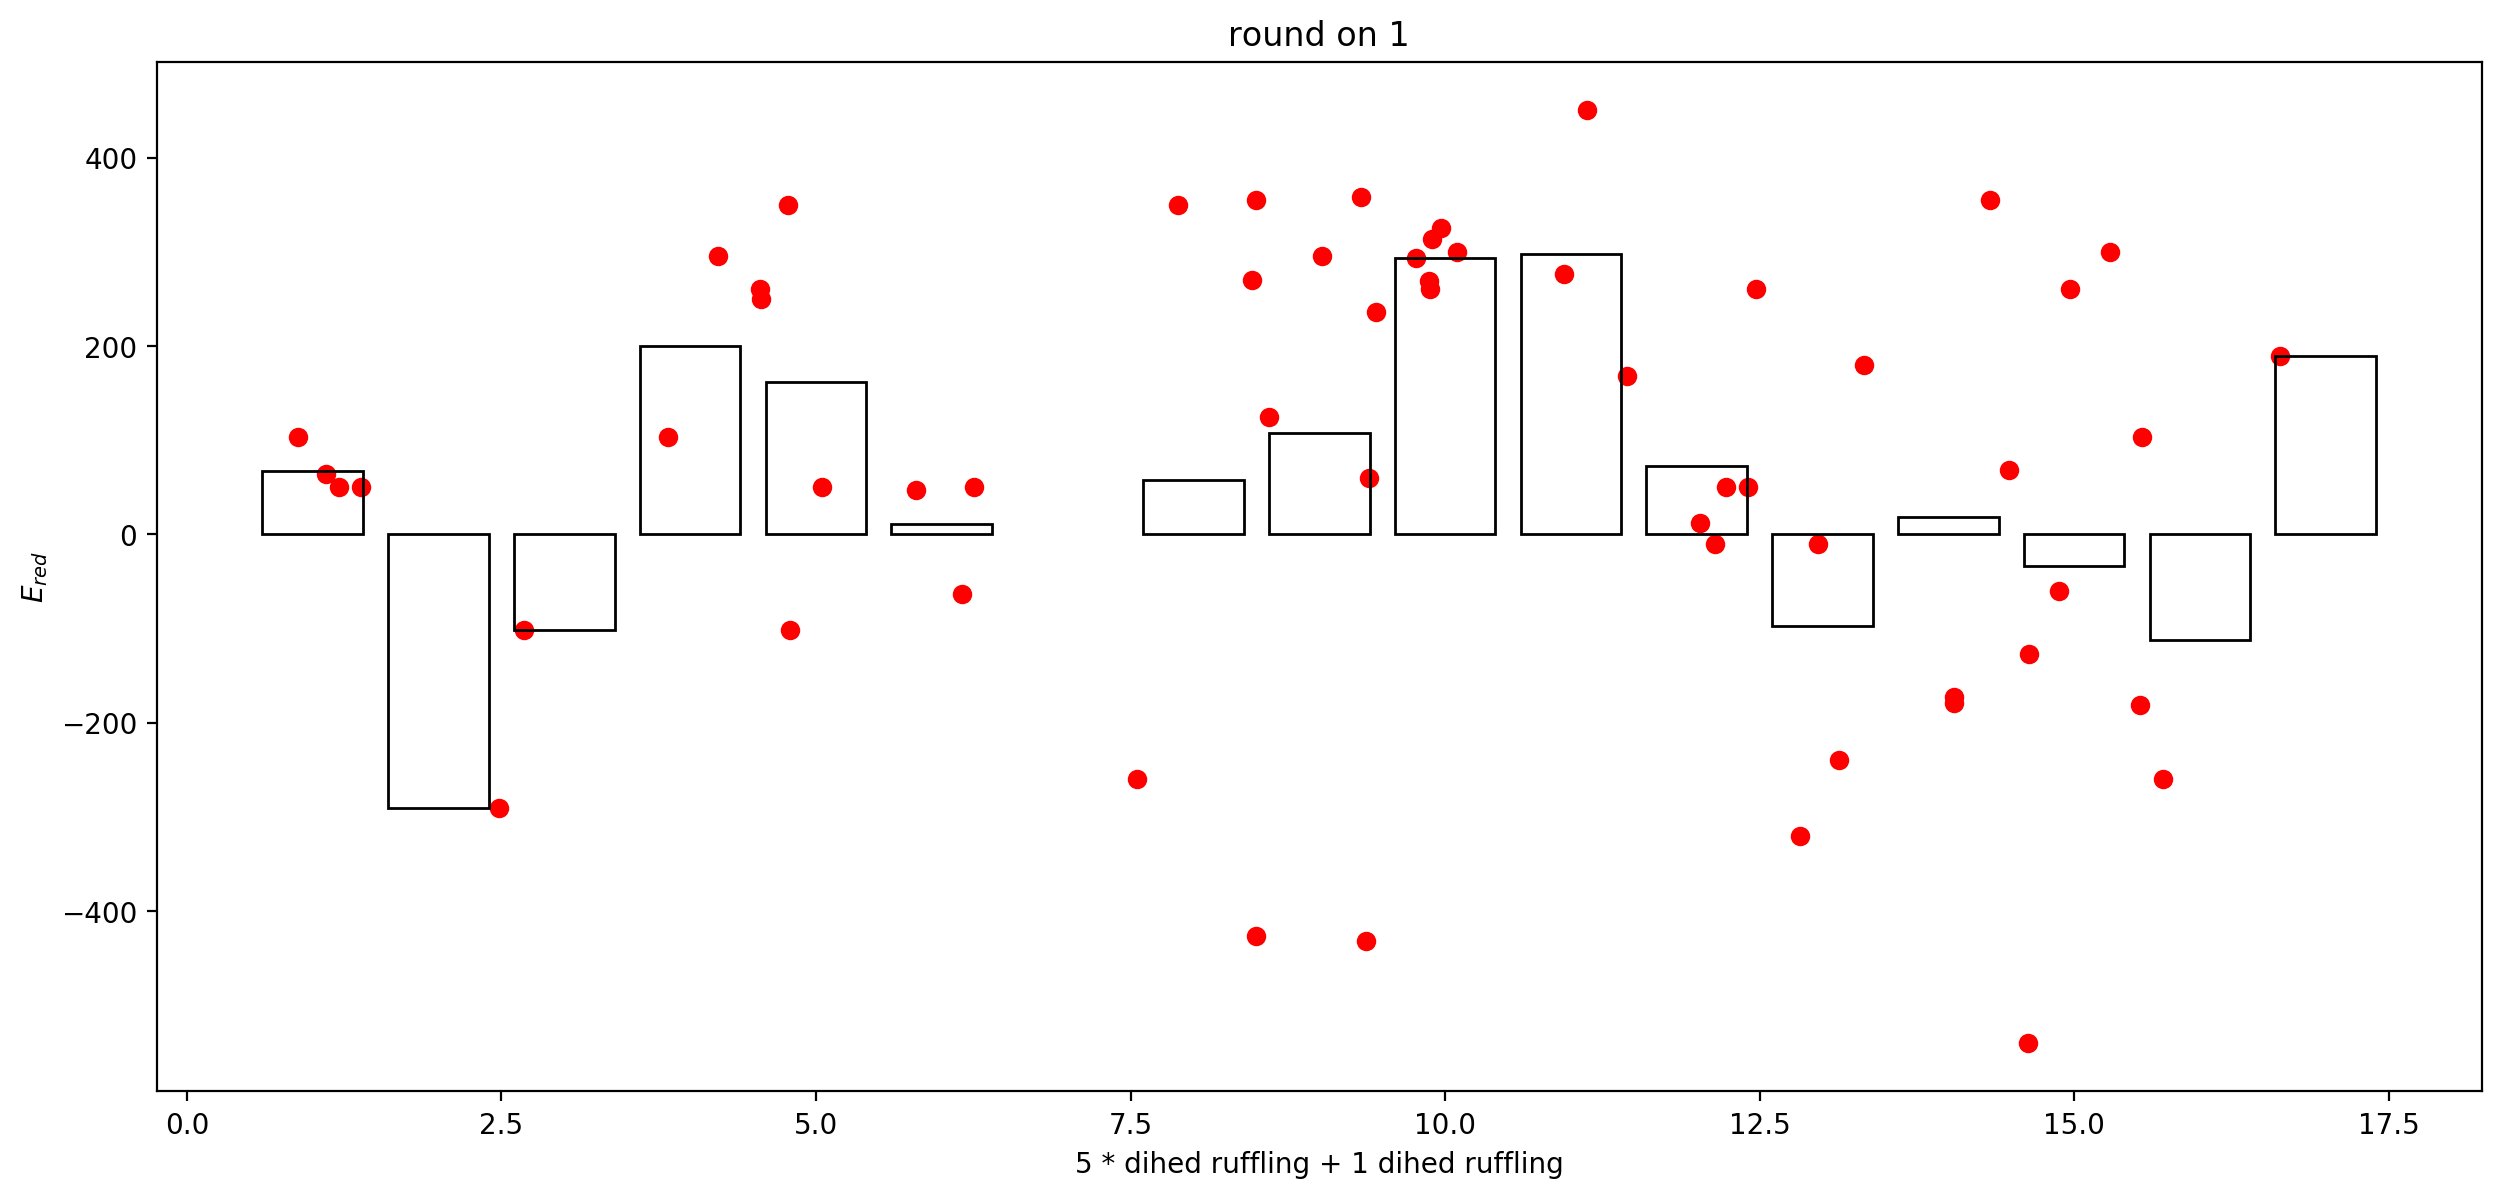

In [32]:
def rounddata(i):
    global rounding 
 

    return int(i/rounding+0.5)*rounding

dfbar = df_mode[["ruffling_max","saddling_max2","Em_lit"]].copy()
dfbar = df_mode[df_mode["ruffling_max"]<20][["ruffling_max","saddling_max2","Em_lit"]].copy()
fig = plt.figure(dpi =200,figsize = [15,15])
roundlist = [1,2,3,4,5,6,1.5,2.5]

r1,s1 = 5,1
dfbar["combi_r1s1"] = (dfbar["ruffling_max"]*r1 +dfbar["saddling_max2"] *s1)/(s1+r1)

rounding =1

dfbar[rounding] = [rounddata(i) for i in dfbar["combi_r1s1"]]
#for i in dfbar["rufround"]:
    #print(dfbar[dfbar["rufround"] ==i]["Em_lit"].mean())

ruflist = list(set(dfbar[rounding]))
ruflist.sort()
emlist = [dfbar[dfbar[rounding] ==i]["Em_lit"].mean() for i in ruflist]


ax = fig.add_subplot(211)

ax.bar(ruflist, emlist, width = rounding*0.8,fill = False)
ax.scatter(dfbar["combi_r1s1"] , dfbar["Em_lit"],c="red")

ax.set_xlabel(f"{r1} * dihed ruffling + {s1} dihed ruffling")
ax.set_ylabel("$E_{red}$")
ax.set_title(f"round on {rounding}")

plt.show()

#plt.bar(ruflist, emlist, width = rounding*0.8)

ruffling: 0.7730501597508354,  saddling: 2.03506501836829


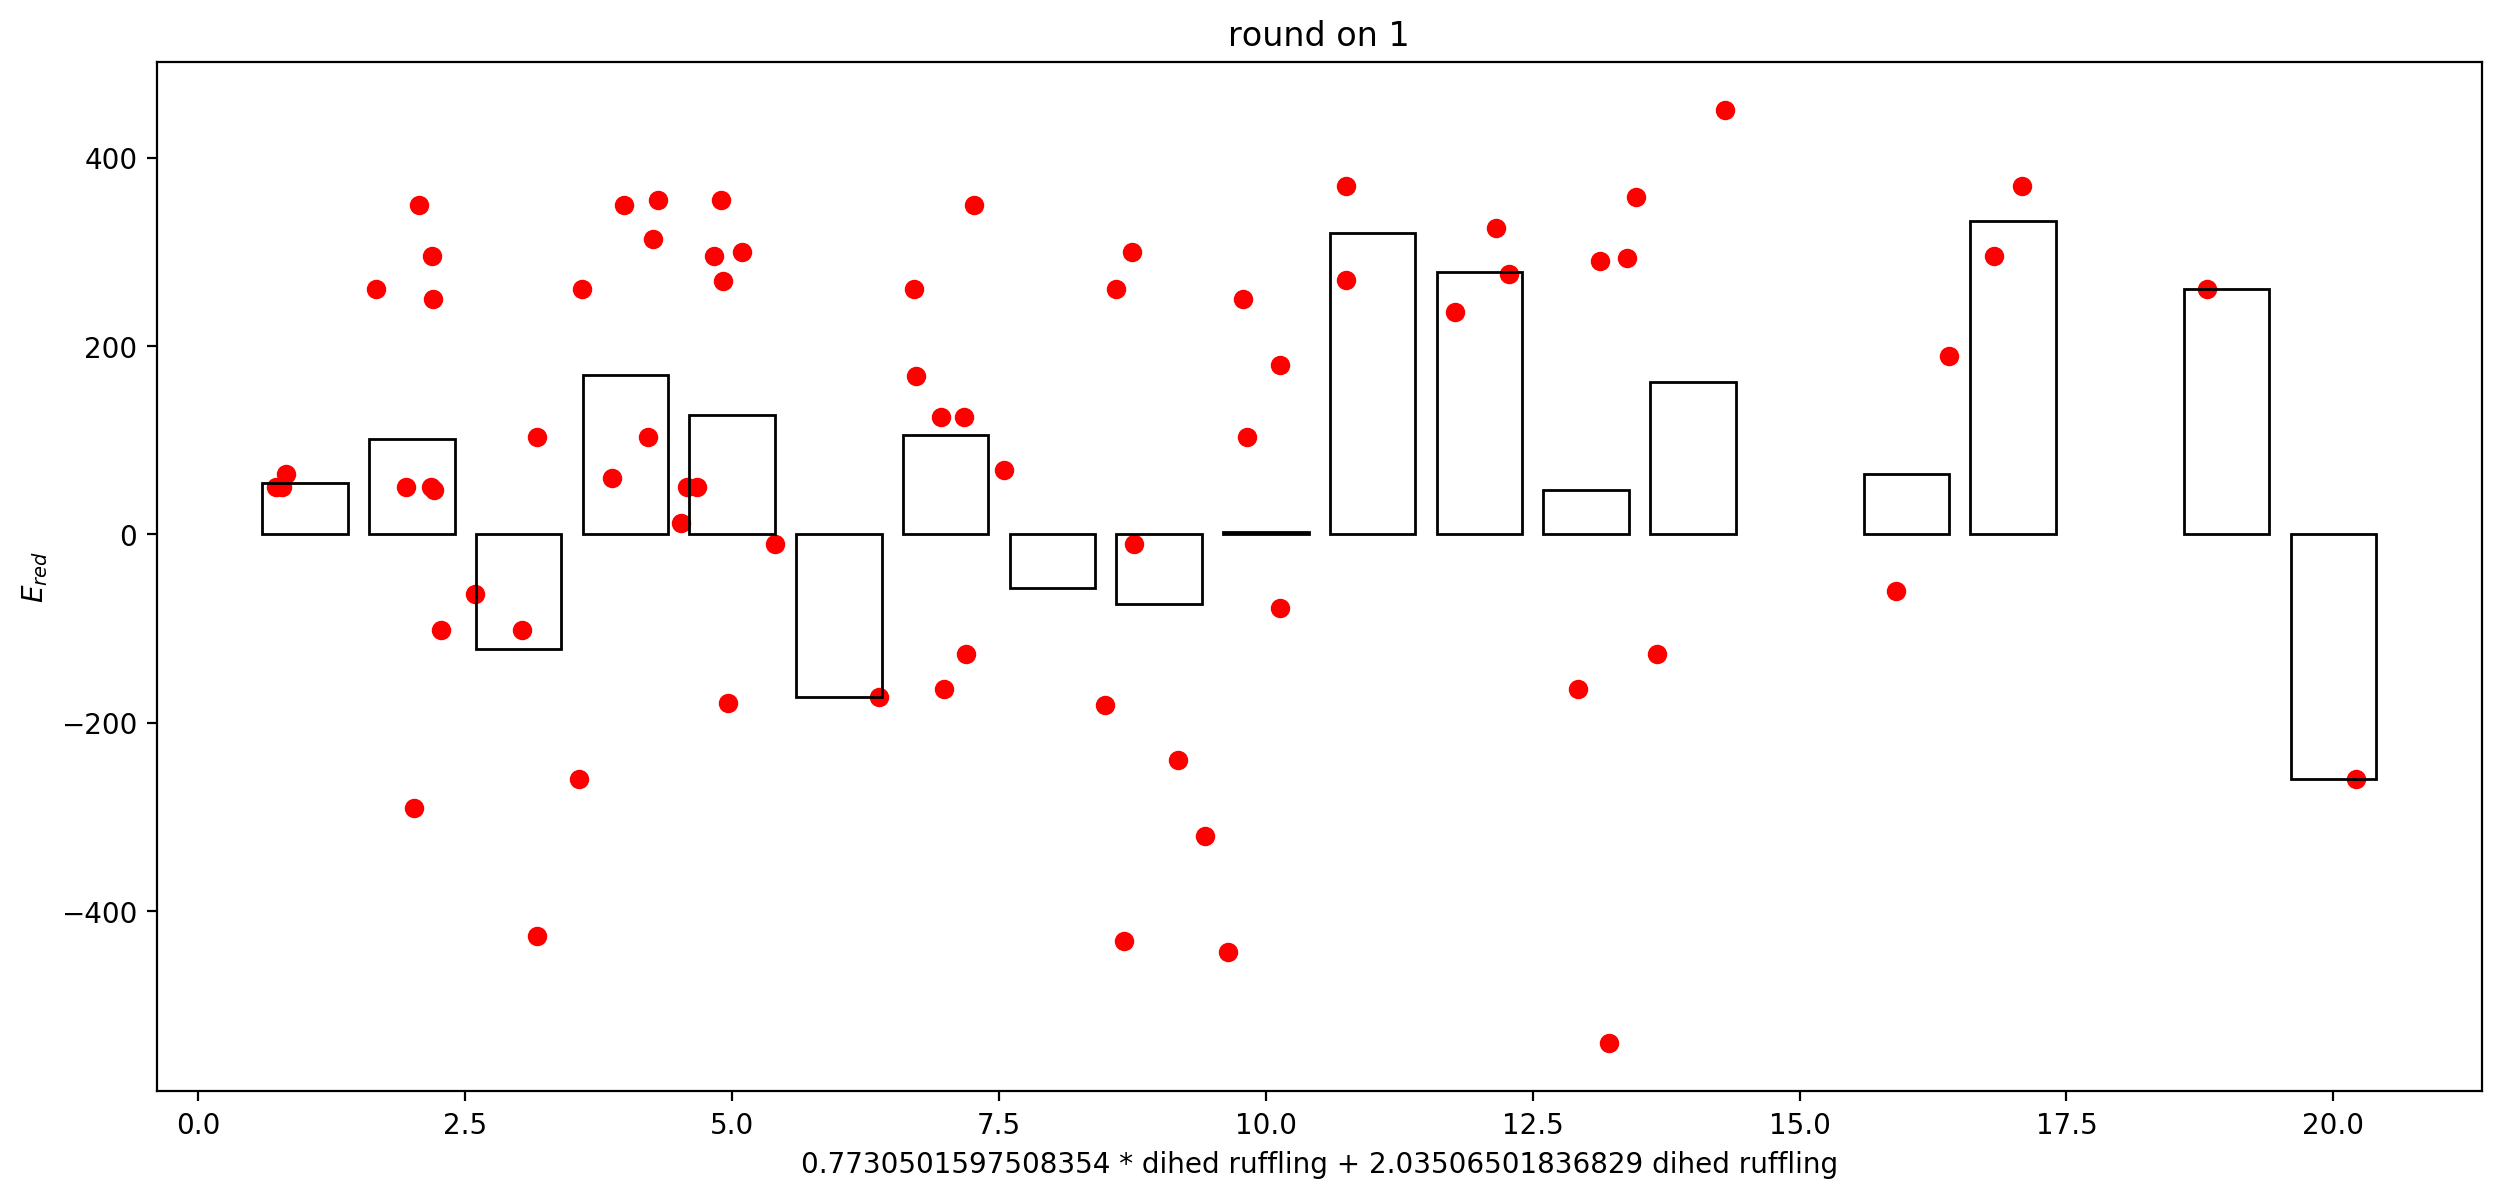

In [33]:
df_mode20 =df_mode[df_mode["ruffling_max"]<200].copy()

model = LinearRegression()
model.fit(df_mode20[["ruffling_max","saddling_max2"]],df_mode20[["Em_lit"]])
r1,s1 = model.coef_[0]
print(f"ruffling: {r1},  saddling: {s1}")
inter = model.intercept_[0]
#plt.scatter([r1*r+s1*s+inter for r,s in zip(df_mode20["ruffling_max"],df_mode20["saddling_max2"])]  ,df_mode20["Em_lit"] )


def rounddata(i):
    global rounding 
 

    return int(i/rounding+0.5)*rounding

dfbar = df_mode[["ruffling_max","saddling_max2","Em_lit"]].copy()
dfbar = df_mode[df_mode["ruffling_max"]<200][["ruffling_max","saddling_max2","Em_lit"]].copy()
fig = plt.figure(dpi =200,figsize = [15,15])
roundlist = [1,2,3,4,5,6,1.5,2.5]

#r1,s1 = 5,1
dfbar["combi_r1s1"] = (dfbar["ruffling_max"]*r1 +dfbar["saddling_max2"] *s1)/(abs(s1)+abs(r1))

rounding =1

dfbar[rounding] = [rounddata(i) for i in dfbar["combi_r1s1"]]
#for i in dfbar["rufround"]:
    #print(dfbar[dfbar["rufround"] ==i]["Em_lit"].mean())

ruflist = list(set(dfbar[rounding]))
ruflist.sort()
emlist = [dfbar[dfbar[rounding] ==i]["Em_lit"].mean() for i in ruflist]


ax = fig.add_subplot(211)

ax.bar(ruflist, emlist, width = rounding*0.8,fill = False)
ax.scatter(dfbar["combi_r1s1"] , dfbar["Em_lit"],c="red")

ax.set_xlabel(f"{r1} * dihed ruffling + {s1} dihed ruffling")
ax.set_ylabel("$E_{red}$")
ax.set_title(f"round on {rounding}")

plt.show()

#plt.bar(ruflist, emlist, width = rounding*0.8)



ruffling: -7.459108031419624,  saddling: 16.43374805649532


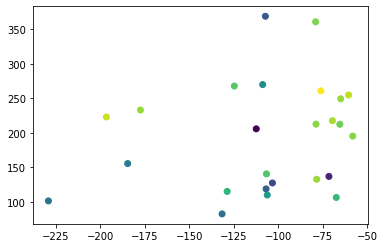

In [34]:
df_mode20 =df_mode[df_mode["ruffling_max"]<200].copy()
df_mode20 =df_mode[df_mode["ruffling_max"]<200][df_mode["saddling_max2"]>5].copy()

model = LinearRegression()
model.fit(df_mode20[["ruffling_max","saddling_max2"]],df_mode20[["Em_lit"]])
r1,s1 = model.coef_[0]
print(f"ruffling: {r1},  saddling: {s1}")
inter = model.intercept_[0]
plt.scatter(df_mode20["ruffling_max"] * r1, df_mode20["saddling_max2"]*s1,c = df_mode20["Em_lit"])

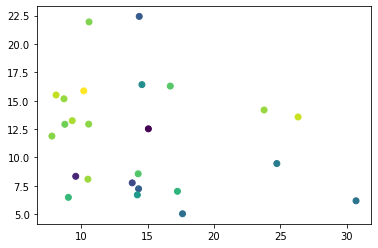

In [35]:
plt.scatter(df_mode20["ruffling_max"] , df_mode20["saddling_max2"],c = df_mode20["Em_lit"])

<BarContainer object of 3 artists>

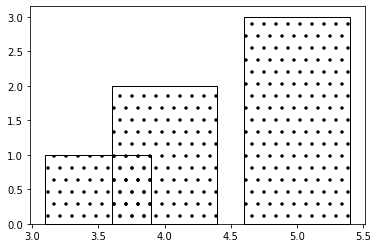

In [36]:

plt.bar([3.5,4,5],[1,2,3],color=["red","red","blue"],hatch =".",fill=False,clip_on=False)

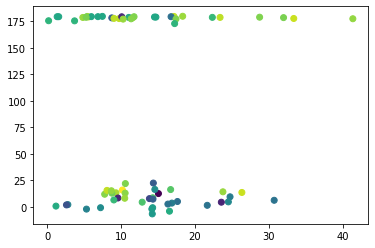

In [37]:
plt.scatter(df_mode["ruffling_max"], df_mode["saddling_max"], c = df_mode["Em_lit"])


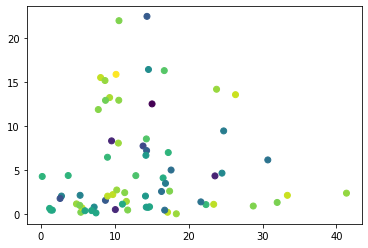

In [38]:
plt.scatter(df_mode["ruffling_max"], df_mode["saddling_max2"], c = df_mode["Em_lit"])

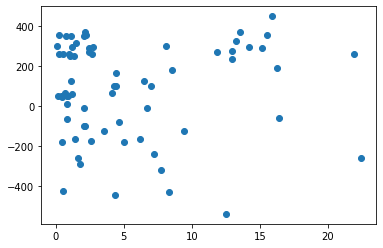

In [39]:
plt.scatter( df_mode["saddling_max2"] , df_mode["Em_lit"])

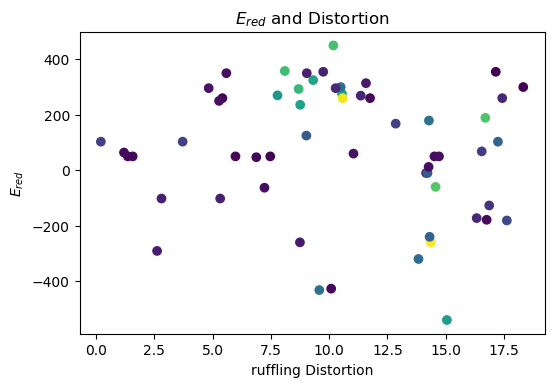

In [40]:

plt.figure(dpi=100)

plt.scatter(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"],df_mode[df_mode["ruffling_max"]<20]["Em_lit"], c =df_mode[df_mode["ruffling_max"]<20]["saddling_max2"] )
plt.title("$E_{red}$ and Distortion")

plt.xlabel('ruffling Distortion')
plt.ylabel('$E_{red}$')
#print(model.score(X_test,y_test))
plt.savefig(f'{plots}distortion_emlit.png')
plt.show()


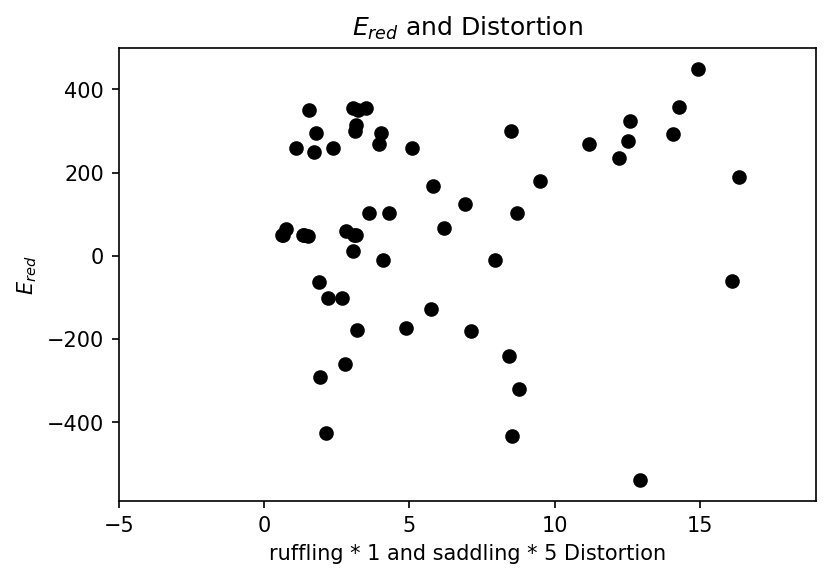

In [41]:
fig = plt.figure(dpi=150)

#plt.scatter(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"],df_mode[df_mode["ruffling_max"]<20]["Em_lit"], c =df_mode[df_mode["ruffling_max"]<20]["saddling_max2"] )
r1, s1 = 1,5
plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20]["Em_lit"],c = "black")
#plt.plot([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20]["Em_lit"], "x", c = "darkred")
#plt.plot([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20]["Em_lit"], "x", c = "darkgreen")
#plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<200]["ruffling_max"], df_mode[df_mode["ruffling_max"]<200]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<200]["Em_lit"])
plt.title("$E_{red}$ and Distortion")
plt.xlim([-5,19])
plt.xlabel(f'ruffling * {r1} and saddling * {s1} Distortion')
plt.ylabel('$E_{red}$')
#print(model.score(X_test,y_test))
fig.colorbar
plt.savefig(f'{plots}distortion_emlit_adding_saddling{s1}_ruffling{r1}.png')



r1 5, s1 0)
r1 5, s1 -1)
r1 5, s1 5)
r1 5, s1 1)
r1 1, s1 5)


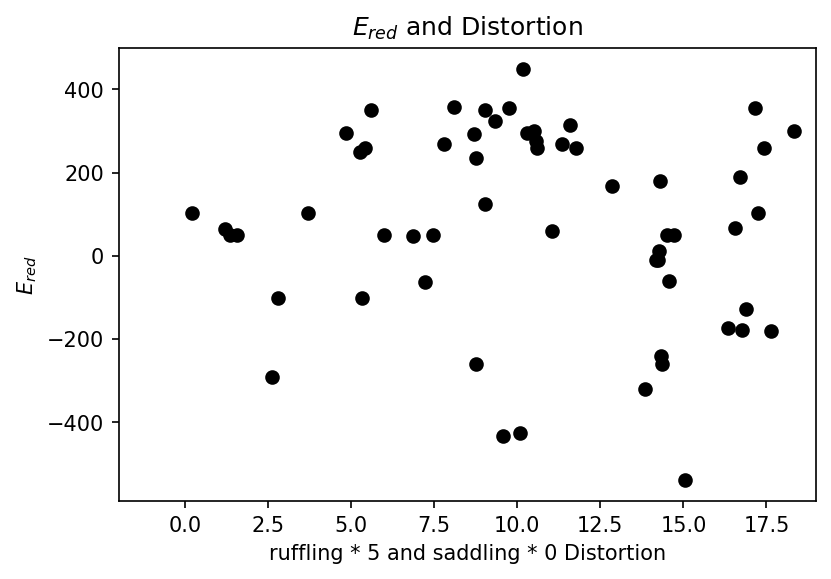

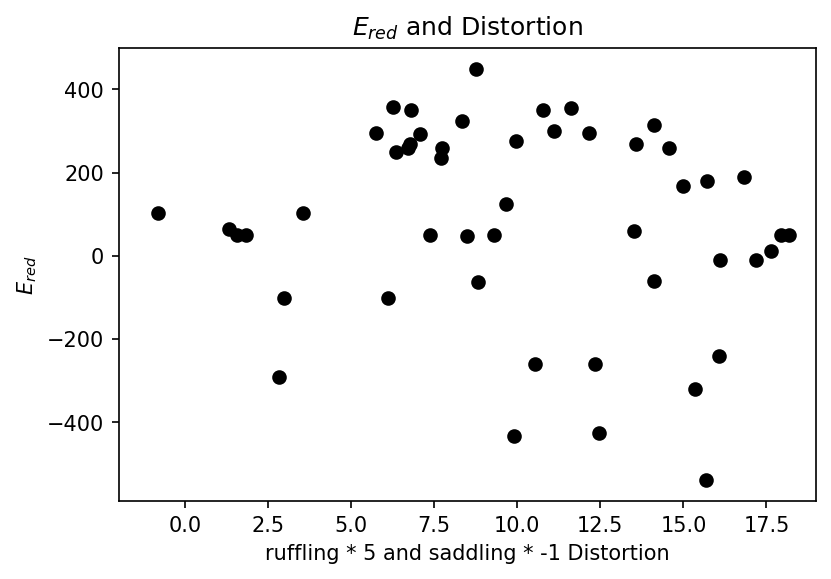

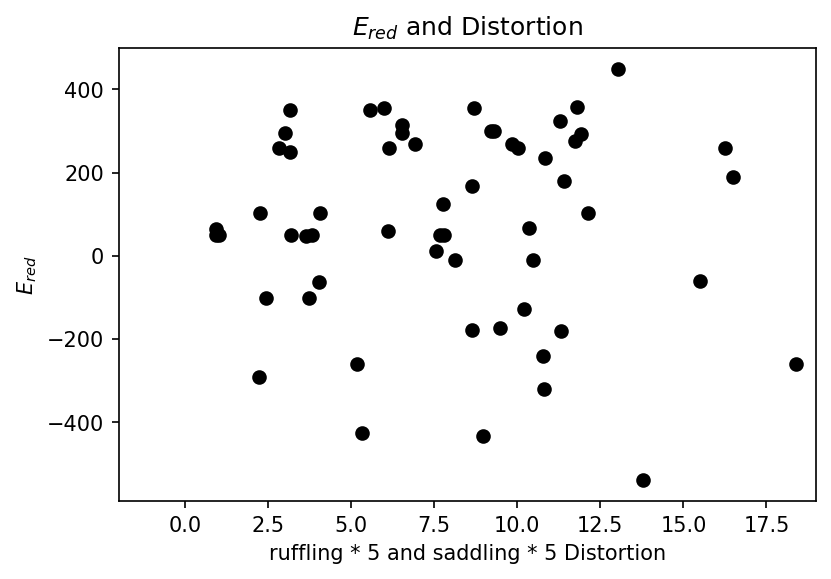

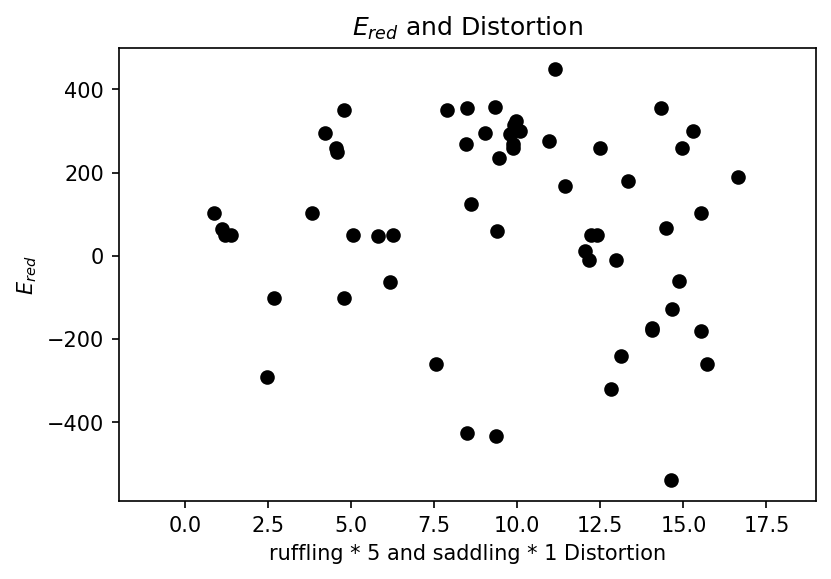

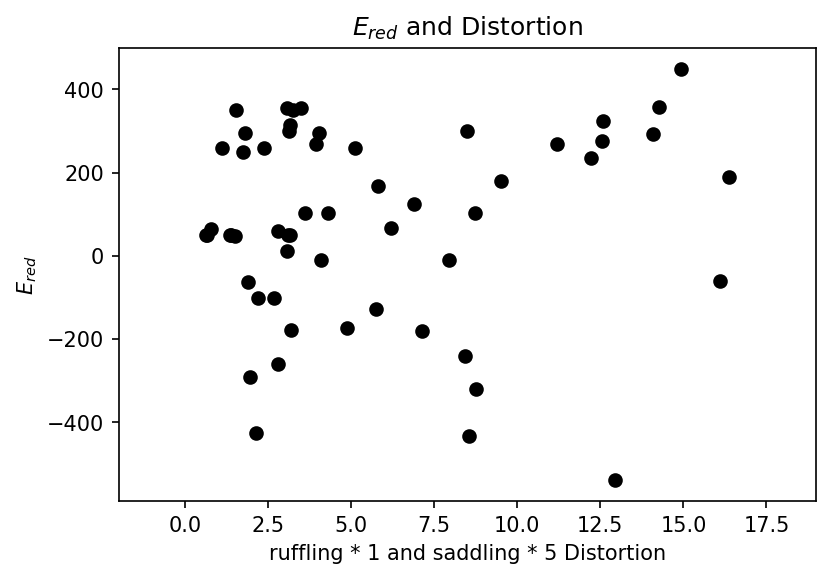

In [42]:
for s1r1 in [[0,5],[-1,5],[5,5],[1,5],[5,1]]:
    fig = plt.figure(dpi=150)

    #plt.scatter(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"],df_mode[df_mode["ruffling_max"]<20]["Em_lit"], c =df_mode[df_mode["ruffling_max"]<20]["saddling_max2"] )
    s1, r1 = s1r1
    print(f"r1 {r1}, s1 {s1})")
    plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20]["Em_lit"],c = "black")
    #plt.plot([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20]["Em_lit"], "x", c = "darkred")
    #plt.plot([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20]["Em_lit"], "x", c = "darkgreen")
    #plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<200]["ruffling_max"], df_mode[df_mode["ruffling_max"]<200]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<200]["Em_lit"])
    plt.title("$E_{red}$ and Distortion")
    plt.xlim([-2,19])
    plt.xlabel(f'ruffling * {r1} and saddling * {s1} Distortion')
    plt.ylabel('$E_{red}$')
    #print(model.score(X_test,y_test))
    fig.colorbar
    plt.savefig(f'{plots}distortion_emlit_adding_saddling{s1}_ruffling{r1}.png')


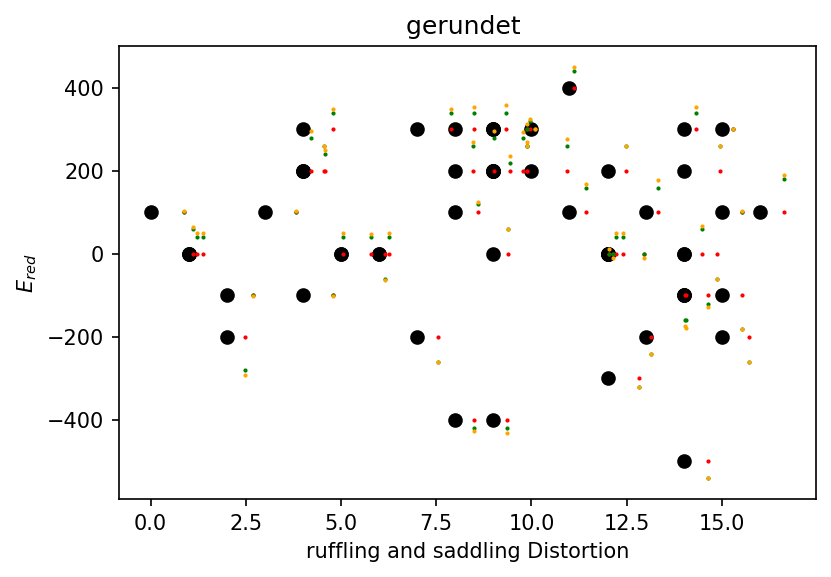

In [43]:
df_mode["20"]=[int(i/20)*20 for i in df_mode["Em_lit"]]
df_mode["50"]=[int(i/50)*50 for i in df_mode["Em_lit"]]
df_mode["100"]=[int(i/100)*100 for i in df_mode["Em_lit"]]
r1, s1 = 50,10






plt.figure(dpi=150)
plt.scatter([int((r*r1+s*s1)/(s1+r1)) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20]["100"],c = "black")
plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20]["100"],s=1,c = "red")
plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20]["20"],s=1,c = "green")
plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20]["Em_lit"],s=1,c = "orange")



plt.title("$\Delta E_{homo-lumo}$ for all values")
plt.title("gerundet ")
plt.xlabel('ruffling and saddling Distortion')
plt.ylabel('$E_{red}$')
#plt.savefig('/home/hagen/Masterarbeit/Arbeit/MasterThesis/img/results/all_chemPot.png')
plt.savefig(f'{plots}runden.png')











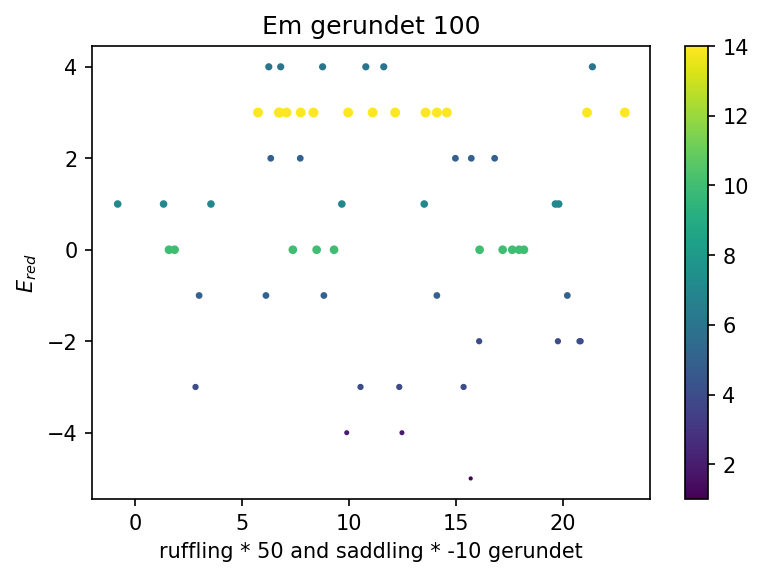

In [44]:
df_mode["20"]=[int(i/20)*20 for i in df_mode["Em_lit"]]
df_mode["50"]=[int(i/50)*50 for i in df_mode["Em_lit"]]
df_mode["100"]=[int(i/100)*100 for i in df_mode["Em_lit"]]
r1, s1 = 50,-10


count = 100
df_mode[count]=[int(i/count)*count for i in df_mode["Em_lit"]]
df_mode[count]=[np.round(i/count) for i in df_mode["Em_lit"]]


valcount = [df_mode[df_mode["ruffling_max"]<20][count].value_counts()[i] for i in df_mode[df_mode["ruffling_max"]<20][count]]
plt.figure(dpi=150)
#plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20][count],c = valcount)
plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20][count],s = valcount,c = valcount)
#plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20]["100"],s=1,c = "red")
#plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20]["20"],s=1,c = "green")
#plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20]["Em_lit"],s=1,c = "orange")



plt.title("$\Delta E_{homo-lumo}$ for all values")
plt.title(f"Em gerundet {count}")
plt.xlabel('ruffling and saddling Distortion')
plt.ylabel('$E_{red}$')
#plt.savefig('/home/hagen/Masterarbeit/Arbeit/MasterThesis/img/results/all_chemPot.png')
plt.savefig(f'{plots}runden.png')
plt.colorbar()




plt.xlabel(f'ruffling * {r1} and saddling * {s1} gerundet')
plt.ylabel('$E_{red}$')
fig.colorbar
plt.savefig(f'{plots}ruffling_{r1}_and_saddling_*_{s1}_gerundet{count}.png')






plots/ruffling_50_and_saddling_*_10_gerundet50.png


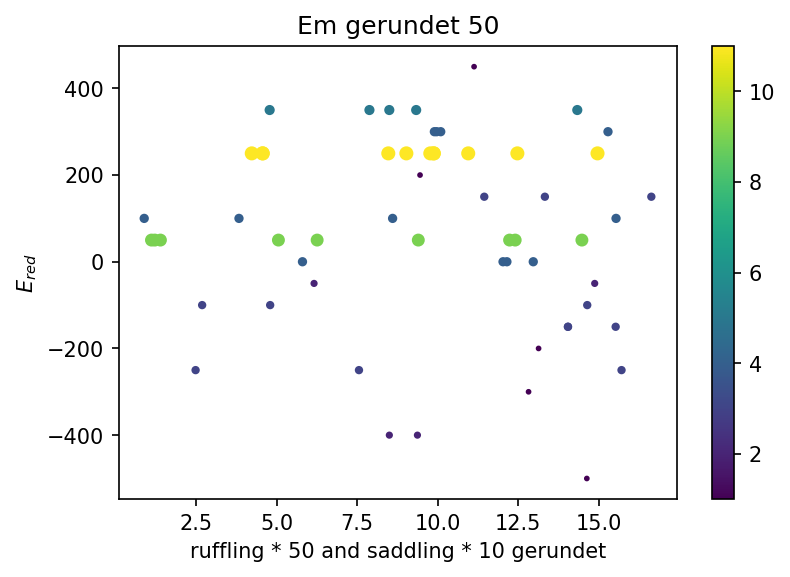

In [45]:
df_mode["20"]=[int(i/20)*20 for i in df_mode["Em_lit"]]
df_mode["50"]=[int(i/50)*50 for i in df_mode["Em_lit"]]
df_mode["100"]=[int(i/100)*100 for i in df_mode["Em_lit"]]
r1, s1 = 50,10


count = 50
df_mode[count]=[int(i/count)*count for i in df_mode["Em_lit"]]
#df_mode[count]=[np.round(i/count) for i in df_mode["Em_lit"]]


valcount = [df_mode[df_mode["ruffling_max"]<20][count].value_counts()[i] for i in df_mode[df_mode["ruffling_max"]<20][count]]
plt.figure(dpi=150)
#plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20][count],c = valcount)
plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20][count],s = [i*3 for i in valcount],c = valcount)
#plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20]["100"],s=1,c = "red")
#plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20]["20"],s=1,c = "green")
#plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20]["Em_lit"],s=1,c = "orange")



plt.title("$\Delta E_{homo-lumo}$ for all values")
plt.title(f"Em gerundet {count}")
plt.xlabel('ruffling and saddling Distortion')
plt.ylabel('$E_{red}$')
#plt.savefig('/home/hagen/Masterarbeit/Arbeit/MasterThesis/img/results/all_chemPot.png')
plt.savefig(f'{plots}runden.png')
plt.colorbar()




plt.xlabel(f'ruffling * {r1} and saddling * {s1} gerundet')
plt.ylabel('$E_{red}$')
fig.colorbar
plt.savefig(f'{plots}ruffling_{r1}_and_saddling_*_{s1}_gerundet{count}.png')
print(f'{plots}ruffling_{r1}_and_saddling_*_{s1}_gerundet{count}.png')





plots/ruffling_50_and_saddling_*_-10_gerundet100_2.png


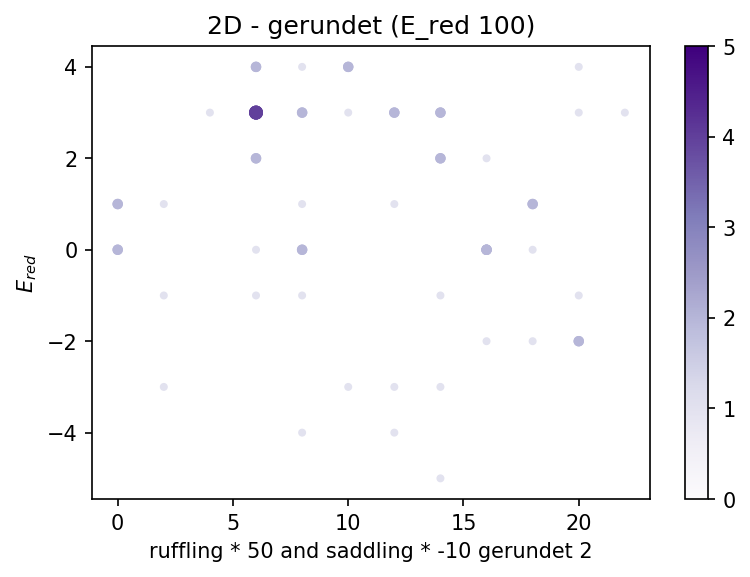

In [46]:

r1, s1 = 50,-10

df_mode3 = df_mode[df_mode["ruffling_max"]<20].copy()

count = 100

df_mode3[count]=[int(i/count)*count for i in df_mode3["Em_lit"]]
df_mode3[count]=[np.round(i/count) for i in df_mode3["Em_lit"]]



plt.figure(dpi=150)
#plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20][count],c = valcount)

dihed = [(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode3["ruffling_max"], df_mode3["saddling_max2"])]
cs = 2

dihedround = [int(i/cs)*cs for i in dihed]
df_mode3["dihedround"] = dihedround #[int(i/3)*3 for i in dist1]
df_mode3["concat"] = [f"{a}{b}" for a,b in zip(df_mode3[count],df_mode3["dihedround"]) ]
valcounts = [df_mode3["concat"].value_counts()[i] for i in df_mode3["concat"]]
#rounddihed = [df_mode3["rufsadd"].value_counts()[i] for i in df_mode3["rufsadd"]]

#plt.scatter(df_mode3["dihedround"], df_mode3[count],c = [-i for i in valcounts],s =  [i*8 for i in  valcounts],cmap = "summer")
plt.scatter(df_mode3["dihedround"], df_mode3[count],c = [i for i in valcounts],s =  [i*8 for i in  valcounts],cmap = "Purples",vmin=0,vmax=5)
#plt.scatter( dist2,df_mode3[count],c = valcounts)
#plt.scatter( dist2,df_mode3[count],s = valcount,c = valcount)
#plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20]["100"],s=1,c = "red")
#plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20]["20"],s=1,c = "green")
#plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20]["Em_lit"],s=1,c = "orange")



plt.title("$\Delta E_{homo-lumo}$ for all values")
plt.title(f"2D - gerundet (E_red {count})")
plt.ylabel('$E_{red}$'+str(count))
#plt.savefig('/home/hagen/Masterarbeit/Arbeit/MasterThesis/img/results/all_chemPot.png')
plt.savefig(f'{plots}runden.png')
plt.colorbar()




plt.xlabel(f'ruffling * {r1} and saddling * {s1} gerundet {cs}')
plt.ylabel('$E_{red}$')
fig.colorbar
print(f'{plots}ruffling_{r1}_and_saddling_*_{s1}_gerundet{count}_{cs}.png')
plt.savefig(f'{plots}ruffling_{r1}_and_saddling_*_{s1}_gerundet{count}_{cs}.png')





In [47]:
df_mode3.head()

,Em_lit,type,ruffling_mean,ruffling_max,saddling_mean,saddling_max,saddling_max2,20,50,100,100,50,dihedround,concat
3CCX,-181.1,Heme B,-0.644245,17.627942,-4.078440,5.025763,5.025763,-180,-150,-100,-2.0,-150,20,-2.020
6U97,179.3,Heme B,1.564556,14.284085,6.825322,8.550658,8.550658,160,150,100,2.0,150,14,2.014
1IQC_HIS,-260.0,NaN,1.707935,14.365049,-75.921531,22.433577,22.433577,-260,-250,-200,-3.0,-250,12,-3.012
1DRM,68.0,Heme B,1.248518,16.548711,-92.815087,-4.130716,4.130716,60,50,0,1.0,50,18,1.018
1F1F,314.0,Heme C,0.653531,11.580548,6.766094,178.527305,1.472695,300,300,300,3.0,300,14,3.014


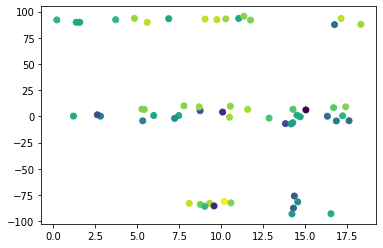

In [48]:
plt.scatter(df_mode3["ruffling_max"],df_mode3["saddling_mean"], c = df_mode3["Em_lit"])

In [49]:
df_saddling_all.head()

,C1_SW_N_S_N_N_C1_NW,C1_SO_N_S_N_N_C1_NO,C1_WS_NW_NO_C1_OS,C1_WN_NW_NO_C1_ON
PDB,,,,
3CCX,-8.322564,-0.885468,-12.131492,5.025763
1EWH,17.023751,5.533247,178.859162,175.968093
1YCC,17.344884,8.540753,177.512014,177.593573
6U97,4.624458,6.383501,8.550658,7.742672
1CCE,-8.632572,-4.517577,-24.606578,9.457818


In [50]:
dicts = {}
for col in df_saddling_all.columns:
    dicts[col] = [180 - abs(i) if abs(i)>90 else abs(i) for i in df_saddling_all[col]]
    
df_saddling_0 = pd.DataFrame(dicts,index = df_saddling_all.index)    

In [51]:
df_mode4 = df_mode3.copy()

In [52]:
df_mode4["saddling_mean2"] = df_saddling_0.mean(axis = 1)

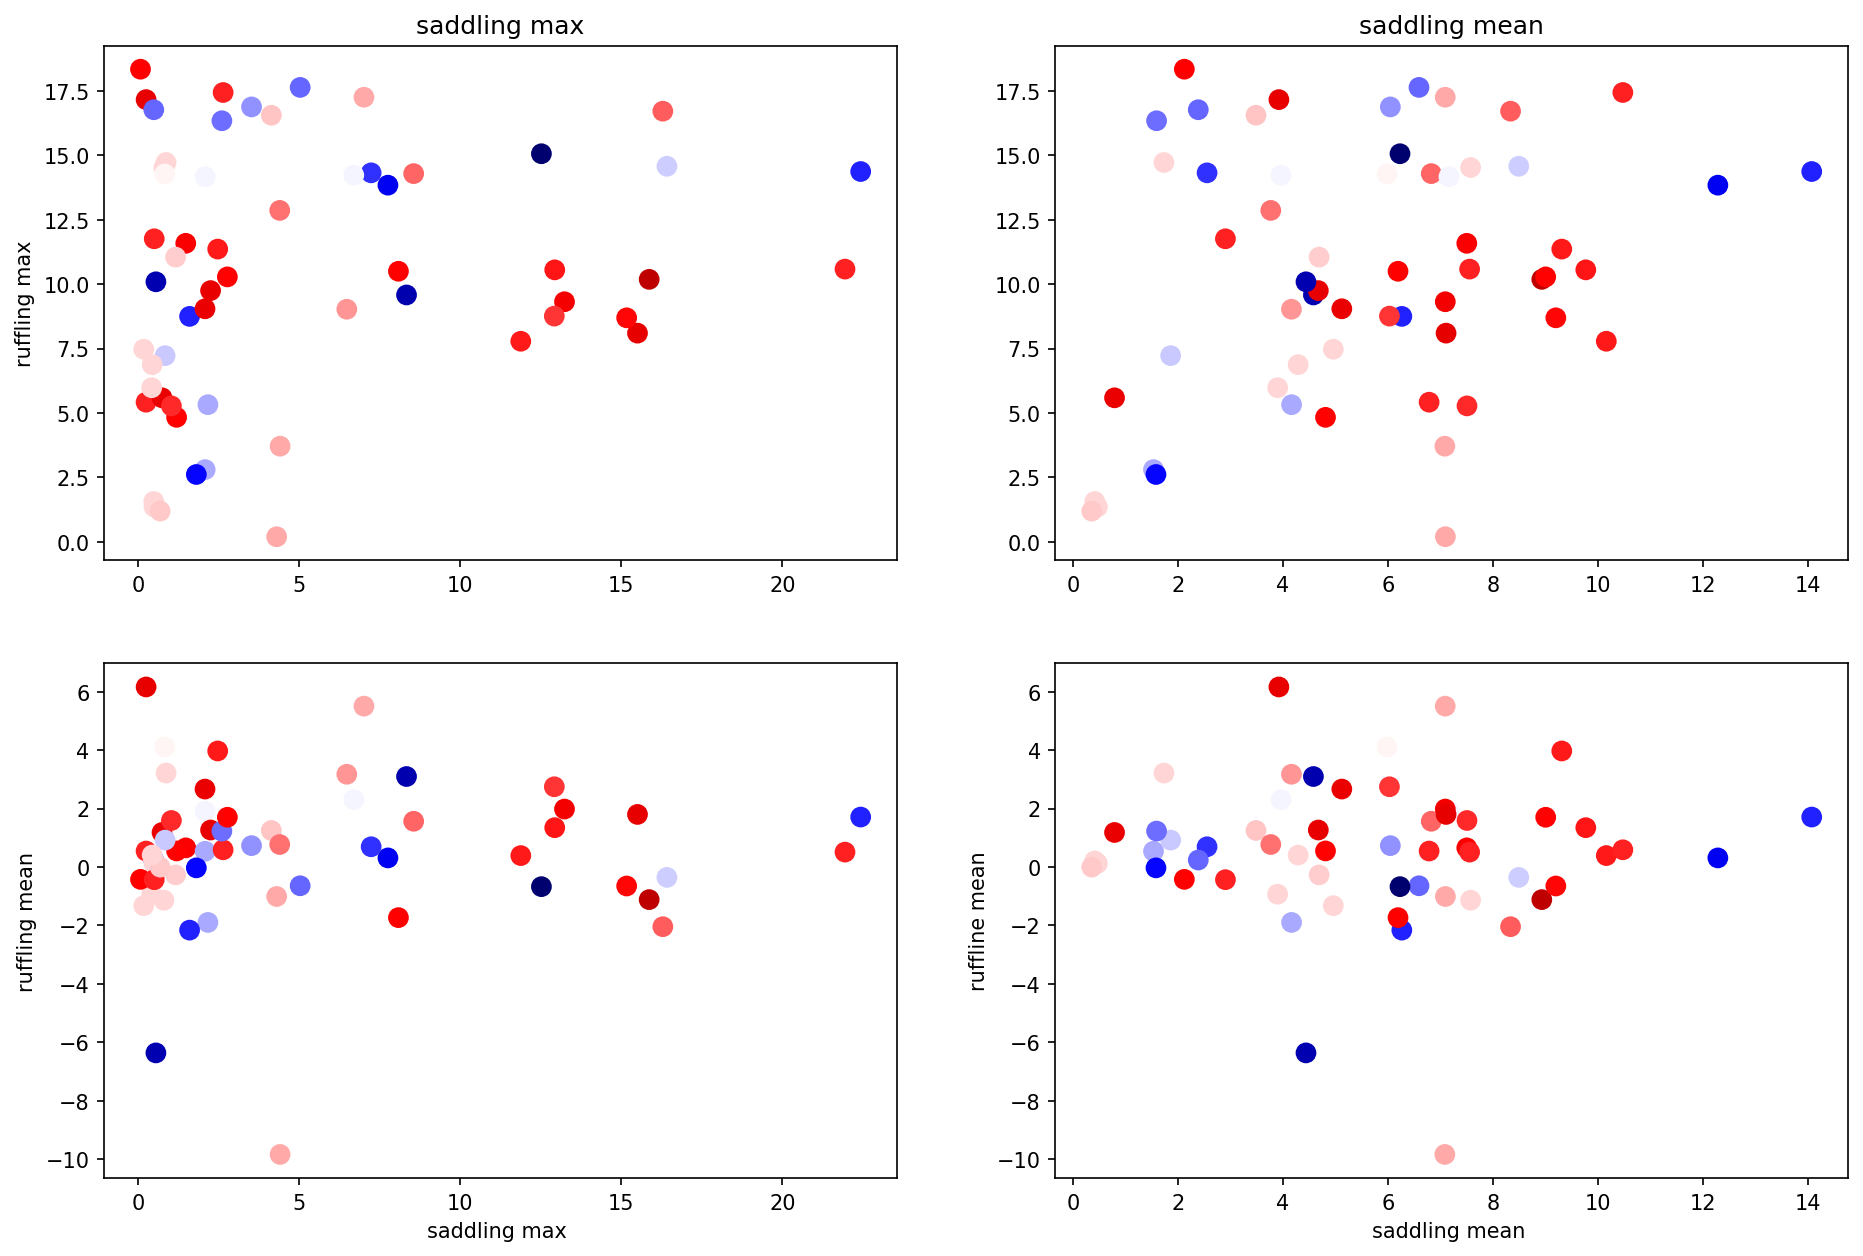

In [53]:
cmap = "seismic"
#plt.figure(4,(25,15))
plt.figure(figsize = (15,10),dpi = 150)
plt.subplot(2,2,1)
plt.scatter(df_mode4["saddling_max2"],df_mode4["ruffling_max"] ,c = df_mode4["Em_lit"],vmin=-600,vmax=600,cmap = cmap,s=80)
plt.title("saddling max")
plt.ylabel("ruffling max")


plt.subplot(2,2,2)
plt.scatter(df_mode4["saddling_mean2"],df_mode4["ruffling_max"] ,c = df_mode4["Em_lit"],vmin=-600,vmax=600,cmap = cmap,s=80)
plt.title("saddling mean")
#plt.colorbar()

plt.subplot(2,2,3)
plt.scatter(df_mode4["saddling_max2"],df_mode4["ruffling_mean"] ,c = df_mode4["Em_lit"],vmin=-600,vmax=600,cmap = cmap,s=80)
plt.ylabel("ruffling mean")
plt.xlabel( "saddling max ")
plt.subplot(2,2,4)
plt.scatter(df_mode4["saddling_mean2"],df_mode4["ruffling_mean"] ,c = df_mode4["Em_lit"],vmin=-600,vmax=600,cmap = cmap,s=80)
a = plt.xlabel( "saddling mean ")
plt.ylabel("ruffline mean")
#plt.colorbar()
plt.savefig(f'{plots}Saddling_and_ruffling.png')

  

Text(0.5, 0, 'ruffline mean')

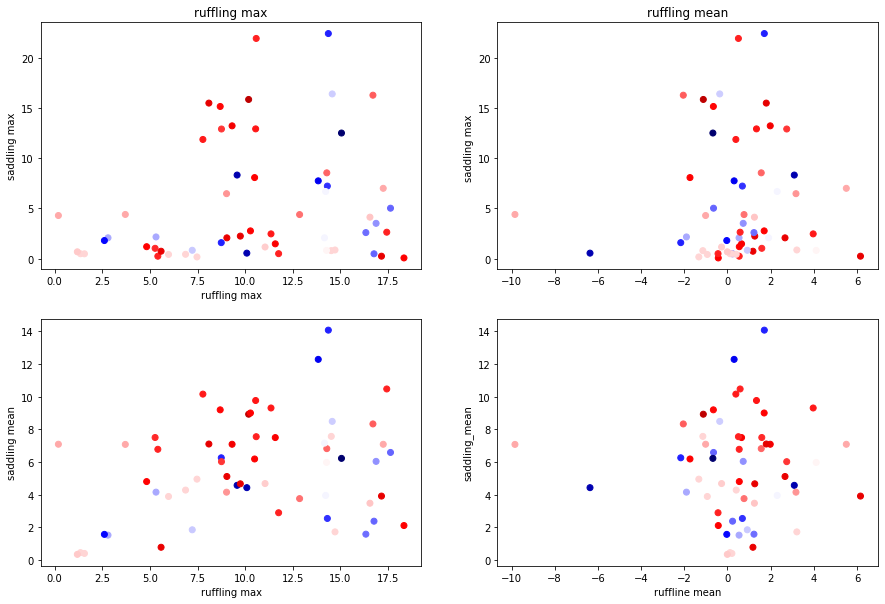

In [54]:
cmap = "seismic"
plt.figure(4,(15,10))
plt.subplot(2,2,1)
plt.scatter(df_mode4["ruffling_max"],df_mode4["saddling_max2"] ,c = df_mode4["Em_lit"],vmin=-600,vmax=600,cmap = cmap)
plt.ylabel("saddling max")
plt.xlabel("ruffling max")
plt.title("ruffling max")



plt.subplot(2,2,3)
plt.scatter(df_mode4["ruffling_max"],df_mode4["saddling_mean2"] ,c = df_mode4["Em_lit"],vmin=-600,vmax=600,cmap = cmap)
plt.ylabel("saddling mean")
#plt.title("ruffling max")
plt.xlabel("ruffling max")
#plt.colorbar()

plt.subplot(2,2,2)
plt.scatter(df_mode4["ruffling_mean"],df_mode4["saddling_max2"] ,c = df_mode4["Em_lit"],vmin=-600,vmax=600,cmap = cmap)
plt.title("ruffling mean")
plt.ylabel( "saddling max ")


plt.subplot(2,2,4)
plt.scatter(df_mode4["ruffling_mean"],df_mode4["saddling_mean2"] ,c = df_mode4["Em_lit"],vmin=-600,vmax=600,cmap = cmap)
#a = plt.xlabel( "saddling mean ")
plt.ylabel("saddling_mean")
plt.xlabel("ruffline mean")
#plt.colorbar()

(-3, 5)

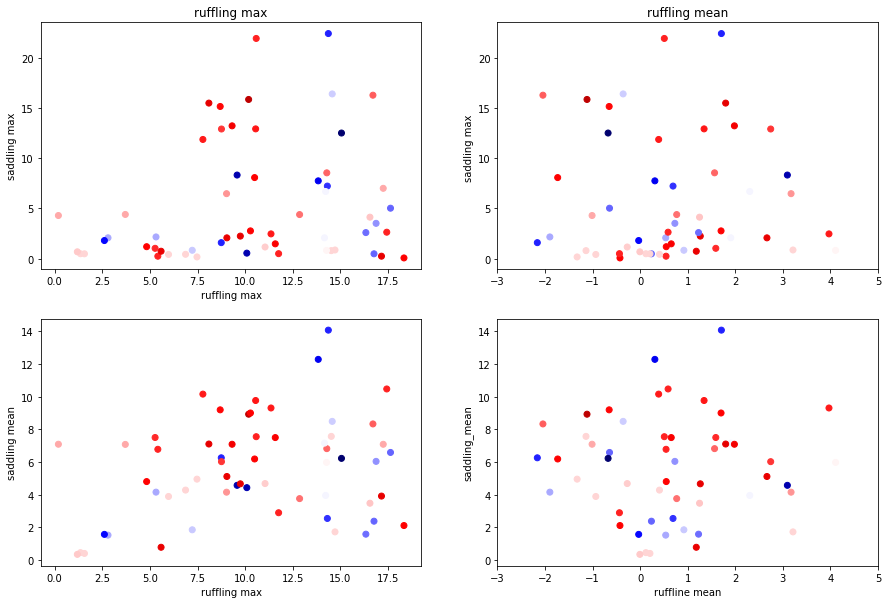

In [55]:
cmap = "seismic"
plt.figure(4,(15,10))
plt.subplot(2,2,1)
plt.scatter(df_mode4["ruffling_max"],df_mode4["saddling_max2"] ,c = df_mode4["Em_lit"],vmin=-600,vmax=600,cmap = cmap)
plt.ylabel("saddling max")
plt.xlabel("ruffling max")
plt.title("ruffling max")



plt.subplot(2,2,3)
plt.scatter(df_mode4["ruffling_max"],df_mode4["saddling_mean2"] ,c = df_mode4["Em_lit"],vmin=-600,vmax=600,cmap = cmap)
plt.ylabel("saddling mean")
#plt.title("ruffling max")
plt.xlabel("ruffling max")
#plt.colorbar()

plt.subplot(2,2,2)
plt.scatter(df_mode4["ruffling_mean"],df_mode4["saddling_max2"] ,c = df_mode4["Em_lit"],vmin=-600,vmax=600,cmap = cmap)
plt.title("ruffling mean")
plt.ylabel( "saddling max ")
plt.xlim([-3,5])


plt.subplot(2,2,4)
plt.scatter(df_mode4["ruffling_mean"],df_mode4["saddling_mean2"] ,c = df_mode4["Em_lit"],vmin=-600,vmax=600,cmap = cmap)
#a = plt.xlabel( "saddling mean ")
plt.ylabel("saddling_mean")
plt.xlabel("ruffline mean")
plt.xlim([-3,5])
#plt.colorbar()

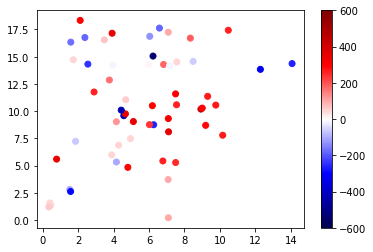

In [56]:
plt.scatter(df_mode4["saddling_mean2"],df_mode4["ruffling_max"] ,c = df_mode4["Em_lit"],vmin=-600,vmax=600,cmap = "seismic")
plt.colorbar()

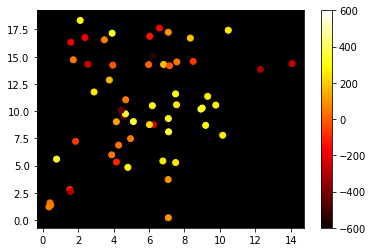

In [57]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1) 
ax.set_facecolor('xkcd:salmon')
ax.set_facecolor((0, 0, 0))
plt.scatter(df_mode4["saddling_mean2"],df_mode4["ruffling_max"] ,c = df_mode4["Em_lit"],vmin=-600,vmax=600,cmap = "hot")
plt.colorbar()

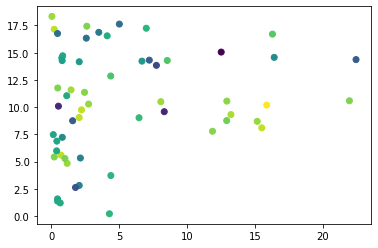

In [58]:
plt.scatter(df_mode4["saddling_max2"],df_mode4["ruffling_max"] ,c = df_mode4["Em_lit"])

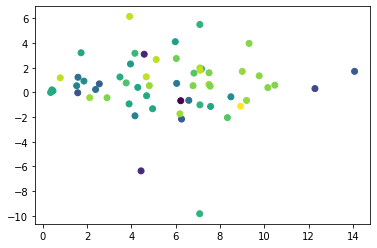

In [59]:
plt.scatter(df_mode4["saddling_mean2"],df_mode4["ruffling_mean"] ,c = df_mode4["Em_lit"])

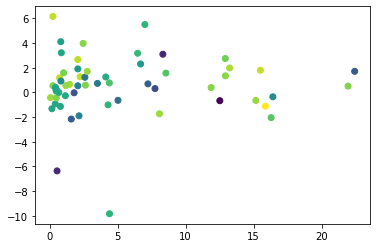

In [60]:
plt.scatter(df_mode4["saddling_max2"],df_mode4["ruffling_mean"] ,c = df_mode4["Em_lit"])

In [61]:
df_mode[df_mode["ruffling_max"]<20][df_mode["Em_lit"]<-200]

/home/hagen/anaconda3/envs/KLeich/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,Em_lit,type,ruffling_mean,ruffling_max,saddling_mean,saddling_max,saddling_max2,20,50,100,100,50
1IQC_HIS,-260.0,NaN,1.707935,14.365049,-75.921531,22.433577,22.433577,-260,-250,-200,-3.0,-250
4K8F,-320.0,Heme B,0.309098,13.835859,-6.882209,7.751604,7.751604,-320,-300,-300,-3.0,-300
2OYY,-540.0,Heme B,-0.674529,15.054889,6.229047,12.517760,12.517760,-540,-500,-500,-5.0,-500
1MZ4,-240.0,Heme C,0.690965,14.313871,-87.449152,7.230043,7.230043,-240,-200,-200,-2.0,-200
2C1D_CSS,-432.0,NaN,3.095290,9.577443,-85.421510,8.328911,8.328911,-420,-400,-400,-4.0,-400
1JBQ,-291.0,Heme B,-0.031252,2.613317,1.576726,1.801030,1.801030,-280,-250,-200,-3.0,-250
1F1C,-260.0,Heme C,-2.162503,8.746073,5.468344,178.408458,1.591542,-260,-250,-200,-3.0,-250
2HPD,-427.0,Heme B,-6.364602,10.087080,4.163884,179.454439,0.545561,-420,-400,-400,-4.0,-400


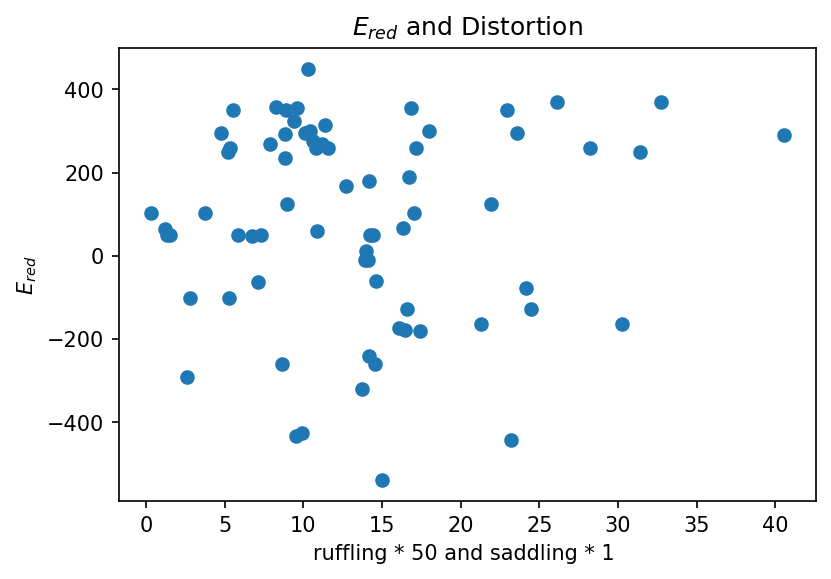

In [62]:
fig = plt.figure(dpi=150)

#plt.scatter(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"],df_mode[df_mode["ruffling_max"]<20]["Em_lit"], c =df_mode[df_mode["ruffling_max"]<20]["saddling_max2"] )
r1, s1 = 50,1
#plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"], df_mode[df_mode["ruffling_max"]<20]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<20]["Em_lit"])
plt.scatter([(r*r1+s*s1)/(s1+r1) for r,s in zip(df_mode[df_mode["ruffling_max"]<200]["ruffling_max"], df_mode[df_mode["ruffling_max"]<200]["saddling_max2"])] ,df_mode[df_mode["ruffling_max"]<200]["Em_lit"])
plt.title("$E_{red}$ and Distortion")

plt.xlabel(f'ruffling * {r1} and saddling * {s1} ')
plt.ylabel('$E_{red}$')
fig.colorbar
plt.savefig(f'{plots}ruffling_{r1}_and_saddling_*_{s1}.png')



In [63]:
singles = ["1a6g", "1a6k", "1a6m", "1ccc", "1ccg ","1cck", "1cmq", "1cmt", "1cry", "1ctj", "1cxc", "1cyi", "1ycj", "1cyo", "1dj1", "1drm", "1ebt", "1ehb", "1es1", "1f1f", "1flp", "1hjt", "1hrc", "1io3", "1jdl", "1jp6", "1jp9", "1ls9", "1moh", "1mz4", "1wej", "1ycc", "2bgv", "351c", "3ccx", "3cu4", "451c", "5mcs"]
singles = [i.upper() for i in singles]
singles = [i for i in singles if i in modelist1]

In [64]:
df_mode_single = df_mode.loc[singles]

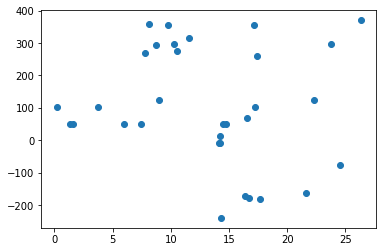

In [65]:
plt.scatter(df_mode_single[df_mode_single["ruffling_max"]<30]["ruffling_max"],df_mode_single[df_mode_single["ruffling_max"]<30]["Em_lit"])

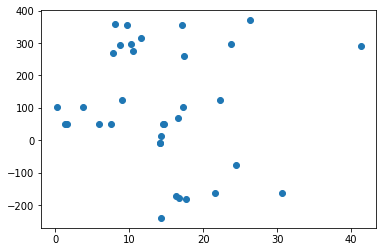

In [66]:
plt.scatter(df_mode_single["ruffling_max"],df_mode_single["Em_lit"])

In [67]:
if(False):    
    df_pydish = pd.read_csv("tables/pydish.csv")
    df_pydish = df_pydish.rename(columns = { "# PDB":"PDB"})
    df_pydish["PDB"] = df_pydish["PDB"].str.upper()
    df_pydish = df_pydish.set_index("PDB")

    df_pydish["HemeA"] = ["_A_" in HEM_ for HEM_ in df_pydish["Heme"]]
    df_pydish = df_pydish[df_pydish["HemeA"]]
    df_pydish = df_pydish.loc[pdbavaible][["ligand","saddling","ruffling","doming"]]
    df_pydish[df_pydish.index.duplicated(keep =False)]
    df_pydish = df_pydish[[a or b for a,b in zip(df_pydish.index!="2GSM", list(df_pydish["ligand"]!="HIS-HOH"))]]
    df_pydish = df_pydish.loc[pdbavaible]


In [68]:
def blindserie(columns,spin,met,pdb):
    ser={}
 #   spin= 5
  #  met = "nbo"
   # pdb = "1CCC"
    for c in columns:
        if c ==  "spin":
            ser[c] = [spin]
        elif c ==  "Ox":
            ser[c] = {1:[0],2:[1],5:[0],6:[1]}[spin]
        elif c == "method":
            ser[c] = [met]
        else:
            ser[c] = [None]
    return pd.DataFrame(ser,index=[pdb])

In [69]:
ls = {}
for spin in [1,2,5,6]:
    for met in ["nbo","chloro"]:
        df_oxmet = df_calc[df_calc["spin"] == spin]
        df_oxmet = df_oxmet[df_oxmet["method"] == met]
        #print(spin, met, [a1 for a1 in pdbavaible if a1 not in df_oxmet.index])
        for pdb in  [a1 for a1 in pdbavaible if a1 not in df_oxmet.index]:
            df_oxmet = df_oxmet.append(blindserie(df_oxmet.columns,spin,met,pdb))    
        df_oxmet = df_oxmet[[n for n in df_oxmet.columns if n not in ["spin", "method", "Ox"]]]

        df_oxmet["diff"] = df_oxmet["lumo"] - df_oxmet["homo"]

        for c in df_oxmet.columns:
            df_oxmet = df_oxmet.rename(columns = {c:c+"_"+str(spin)+"_"+met}) 
        df_oxmet = df_oxmet.loc[pdbavaible]                                    
        ls[str(spin)+met] = df_oxmet


In [70]:
for k in ls.keys():
    print(k,ls[k].shape)

1nbo (33, 13)
1chloro (33, 13)
2nbo (33, 13)
2chloro (33, 13)
5nbo (33, 13)
5chloro (33, 13)
6nbo (33, 13)
6chloro (33, 13)


In [71]:
dfex_lit.loc[pdbavaible]
df_work = dfex_lit.loc[pdbavaible].copy()
for k in ls.keys():
    df_work = pd.concat([df_work, ls[k] ],axis=1)
#df_work = pd.concat([df_work, _dihedral.loc[pdbavaible] ],axis=1)
#df_work = pd.concat([df_work,df_pydish ],axis=1)

In [72]:
ligdict = {"mono-His" :"His", "His-Met"     :"His-Met","Bis-His"    : "His-His","Cys-His"   : "Cys-His","Tyr"         : "Tyr","His"         : "His","His-His"     : "His-His","Met-His" : "His-Met","HOH":"HOH", "IMD":"IMD"}
df_work["Ligand"] = [ligdict[i] for i in df_work["Ligand"]]

In [73]:
df_work[[not i in list(ligdict.keys()) for i in df_work["Ligand"]]]

,Elektrode,Ligand,Em_lit,e_1_nbo,edisp_1_nbo,homo_1_nbo,lumo_1_nbo,chem_pot_1_nbo,dipole_1_nbo,qpole1_1_nbo,...,lumo_6_chloro,chem_pot_6_chloro,dipole_6_chloro,qpole1_6_chloro,qpole2_6_chloro,qpole3_6_chloro,qpole4_6_chloro,polar-iso_6_chloro,polar-aniso_6_chloro,diff_6_chloro
pdb,,,,,,,,,,,,,,,,,,,,,


# _____________________________

In [74]:
df_work["Ligand"].value_counts()

His        14
His-Met    10
His-His     5
Tyr         1
Cys-His     1
IMD         1
HOH         1
Name: Ligand, dtype: int64

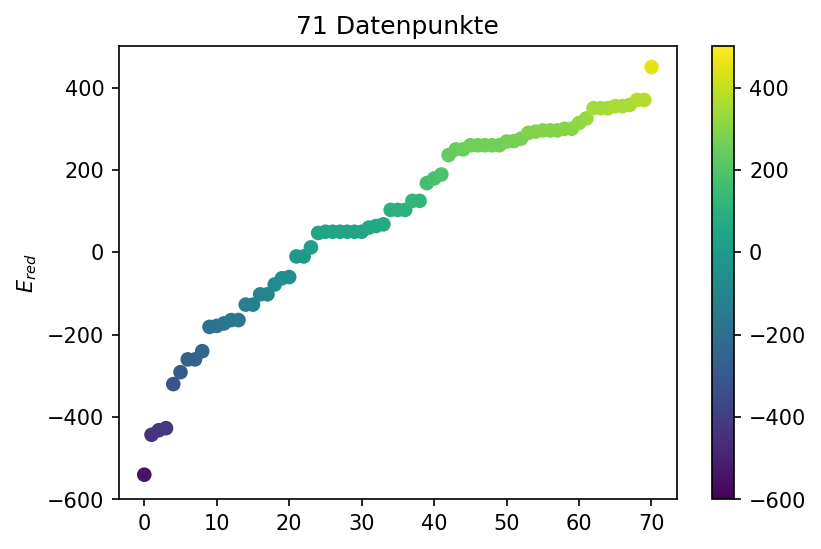

In [75]:
plt.figure(dpi=150)
l = list(df_mode["Em_lit"])
l.sort()
plt.scatter(range(len(l)),l,c=l,vmin = -600, vmax = 500)
plt.ylim([-600,500])
plt.colorbar()#, cmap = "hot")
#X_train,X_test,y_train,y_test = train_test_split(df_nbo[["diff"]], df_nbo[["EMv"]])
#model = LinearRegression()
#model.fit(X_train,y_train)

plt.title("$\Delta E_{homo-lumo}$ for all values")
plt.title("$E_{red}$ in Reihenfolge")
plt.title(f"{len(l)} Datenpunkte")
#plt.xlabel(r' $\Delta E_{homo-lumo}$')
plt.ylabel('$E_{red}$')
#print(model.score(X_test,y_test))

plt.savefig(f'{plots}order_media.png')


In [76]:
if (False):
    a,b = np.polyfit(range(len(l)),l, 1)
    #array([ 0.06009446,  1.41648096])
    #    y ≈ exp(1.42) * exp(0.0601 * x) = 4.12 * exp(0.0601 * x)
    plt.scatter(x, i)

In [77]:
#df_work =df_work.loc[[i for i in df_work.index if i != "1AW3"]]

In [78]:
df_work["Hemetype"]=[dfHemetype.loc[i][0] for i in df_work.index]
df_work2 = df_work[[c for c in df_work.columns if True not in df_work[c].isna().value_counts().index]]

In [79]:
df_work.head()

,Elektrode,Ligand,Em_lit,e_1_nbo,edisp_1_nbo,homo_1_nbo,lumo_1_nbo,chem_pot_1_nbo,dipole_1_nbo,qpole1_1_nbo,...,chem_pot_6_chloro,dipole_6_chloro,qpole1_6_chloro,qpole2_6_chloro,qpole3_6_chloro,qpole4_6_chloro,polar-iso_6_chloro,polar-aniso_6_chloro,diff_6_chloro,Hemetype
pdb,,,,,,,,,,,,,,,,,,,,,
1AW3,SHE,His-His,-102.0,-3627.679882,-89.619345,-0.17366,-0.06974,-0.12170,5.0509,46.364063,...,-0.16586,9.4429,44.926527,-14.027890,-30.898637,56.301867,NaN,NaN,0.11398,Heme B
1FHF,SHE,His,-443.0,-3455.422494,-78.685821,-0.16090,-0.09964,-0.13027,4.3885,42.098369,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heme B
1CCC,SHE,His,-78.0,-3438.104784,-79.593945,-0.18310,-0.08935,-0.13623,14.1950,23.415223,...,-0.17279,17.9810,33.188013,-2.146788,-31.041225,45.492972,NaN,NaN,0.09988,Heme B
1A6G,NHE,His,50.0,-3475.471726,-81.291268,-0.16762,-0.09782,-0.13272,3.8308,28.314378,...,-0.16626,2.4694,41.033578,-16.921591,-24.111986,50.512203,NaN,NaN,0.07653,Heme B
1A6K,NHE,His,50.0,-3438.491317,-80.082741,-0.17131,-0.08915,-0.13023,4.3748,28.284534,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Heme B


In [80]:
df_work2.head()

,Elektrode,Ligand,Em_lit,e_1_nbo,edisp_1_nbo,homo_1_nbo,lumo_1_nbo,chem_pot_1_nbo,dipole_1_nbo,qpole1_1_nbo,...,homo_5_nbo,lumo_5_nbo,chem_pot_5_nbo,dipole_5_nbo,qpole1_5_nbo,qpole2_5_nbo,qpole3_5_nbo,qpole4_5_nbo,diff_5_nbo,Hemetype
pdb,,,,,,,,,,,,,,,,,,,,,
1AW3,SHE,His-His,-102.0,-3627.679882,-89.619345,-0.17366,-0.06974,-0.12170,5.0509,46.364063,...,-0.17767,-0.07272,-0.12520,4.9667,48.993575,-16.502992,-32.490583,61.060274,0.10495,Heme B
1FHF,SHE,His,-443.0,-3455.422494,-78.685821,-0.16090,-0.09964,-0.13027,4.3885,42.098369,...,-0.17172,-0.07166,-0.12169,5.3105,37.296808,7.870546,-45.167353,59.102345,0.10006,Heme B
1CCC,SHE,His,-78.0,-3438.104784,-79.593945,-0.18310,-0.08935,-0.13623,14.1950,23.415223,...,-0.17605,-0.08970,-0.13288,14.2877,23.127998,10.741312,-33.869310,42.395875,0.08635,Heme B
1A6G,NHE,His,50.0,-3475.471726,-81.291268,-0.16762,-0.09782,-0.13272,3.8308,28.314378,...,-0.15907,-0.07591,-0.11749,2.4858,29.722478,-7.264996,-22.457482,37.954504,0.08316,Heme B
1A6K,NHE,His,50.0,-3438.491317,-80.082741,-0.17131,-0.08915,-0.13023,4.3748,28.284534,...,-0.17266,-0.09158,-0.13212,4.2376,28.198333,-7.505363,-20.692970,35.772552,0.08108,Heme B


In [81]:
df_work_distortion = df_work2.copy()
df_work_distortion["ruffling_mean"] = df_ruffling.mean(axis = 1)
df_work_distortion["ruffling_max"] = df_ruffling.max(axis = 1)
df_work_distortion["saddling_mean"] = df_saddling.mean(axis = 1)
df_work_distortion["saddling_max"] = df_saddling.max(axis = 1)
df_work_distortion_only = df_work_distortion[["Em_lit","ruffling_mean","ruffling_max","saddling_mean","saddling_max"]]


In [82]:
df_work_HemeB = df_work2[df_work2["Hemetype"] == "Heme B"]
df_work_distortion_HemeB = df_work_distortion[df_work_distortion["Hemetype"] == "Heme B"]
df_work_distortion_only_HemeB =  df_work_distortion_only[df_work2["Hemetype"] == "Heme B"]

In [83]:
df_work_His = df_work2[df_work2["Ligand"] == "His"]

In [84]:
df_work2.head()

,Elektrode,Ligand,Em_lit,e_1_nbo,edisp_1_nbo,homo_1_nbo,lumo_1_nbo,chem_pot_1_nbo,dipole_1_nbo,qpole1_1_nbo,...,homo_5_nbo,lumo_5_nbo,chem_pot_5_nbo,dipole_5_nbo,qpole1_5_nbo,qpole2_5_nbo,qpole3_5_nbo,qpole4_5_nbo,diff_5_nbo,Hemetype
pdb,,,,,,,,,,,,,,,,,,,,,
1AW3,SHE,His-His,-102.0,-3627.679882,-89.619345,-0.17366,-0.06974,-0.12170,5.0509,46.364063,...,-0.17767,-0.07272,-0.12520,4.9667,48.993575,-16.502992,-32.490583,61.060274,0.10495,Heme B
1FHF,SHE,His,-443.0,-3455.422494,-78.685821,-0.16090,-0.09964,-0.13027,4.3885,42.098369,...,-0.17172,-0.07166,-0.12169,5.3105,37.296808,7.870546,-45.167353,59.102345,0.10006,Heme B
1CCC,SHE,His,-78.0,-3438.104784,-79.593945,-0.18310,-0.08935,-0.13623,14.1950,23.415223,...,-0.17605,-0.08970,-0.13288,14.2877,23.127998,10.741312,-33.869310,42.395875,0.08635,Heme B
1A6G,NHE,His,50.0,-3475.471726,-81.291268,-0.16762,-0.09782,-0.13272,3.8308,28.314378,...,-0.15907,-0.07591,-0.11749,2.4858,29.722478,-7.264996,-22.457482,37.954504,0.08316,Heme B
1A6K,NHE,His,50.0,-3438.491317,-80.082741,-0.17131,-0.08915,-0.13023,4.3748,28.284534,...,-0.17266,-0.09158,-0.13212,4.2376,28.198333,-7.505363,-20.692970,35.772552,0.08108,Heme B


In [85]:
"_________________________________________________________________________________________________________________________________________________________________________________________"

'_________________________________________________________________________________________________________________________________________________________________________________________'

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import numpy as np

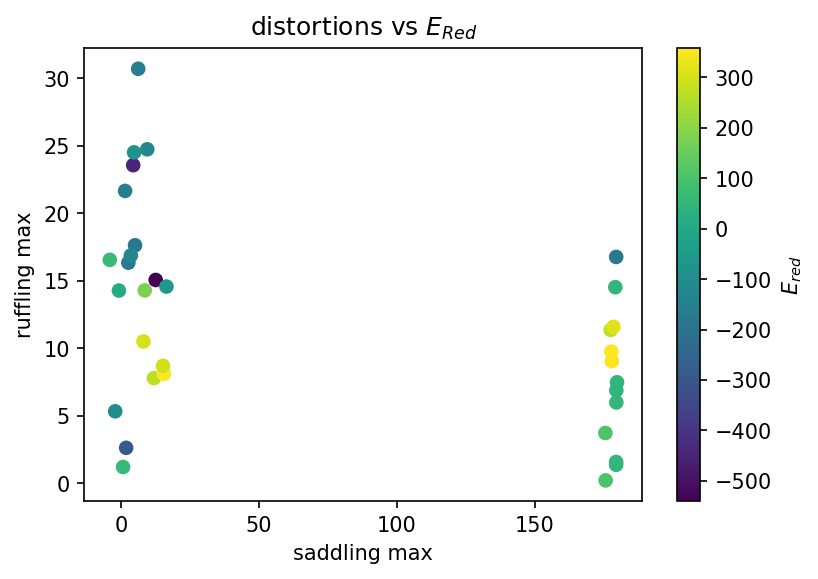

In [87]:
plt.figure(dpi = 150)
df_work_distortion[["saddling_max","ruffling_max","Em_lit"]]
plt.xlabel("saddling max")
plt.ylabel("ruffling max")
plt.title("distortions vs $E_{Red}$")
#plt.label("Em_red")
plt.scatter( df_work_distortion["saddling_max"],  df_work_distortion["ruffling_max"], c = df_work_distortion["Em_lit"]  )


plt.colorbar(label ="$E_{red}$")
plt.savefig(f"{plots}saddling1.png")

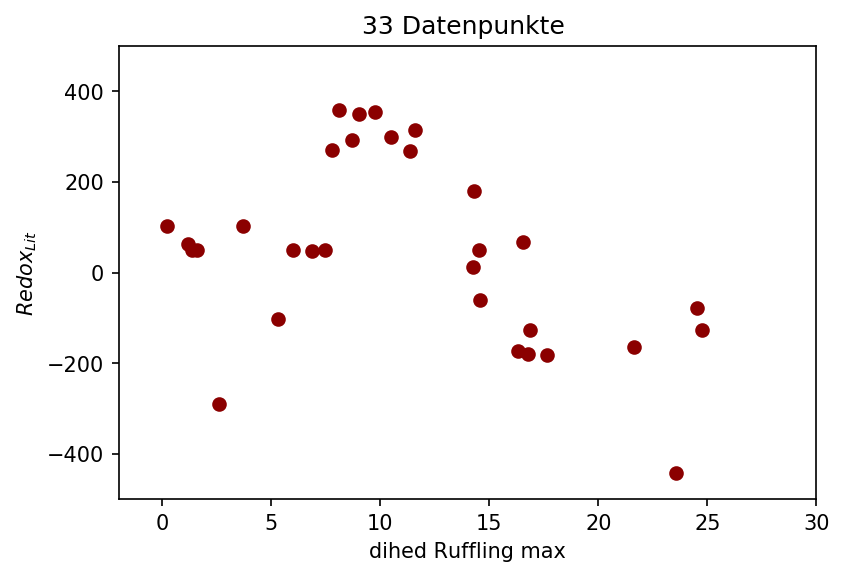

In [88]:
plt.figure(dpi=150)

plt.scatter(df_work_distortion["ruffling_max"], df_work_distortion["Em_lit"]  ,c= "darkred")
plt.savefig('/home/hagen/Masterarbeit/Arbeit/MasterThesis/img/results/ruffling.png')
plt.xlim([-2,30])
plt.ylim([-500,500])
plt.title(f"{len(list(df_work_distortion['Em_lit']))} Datenpunkte ")

plt.xlabel("dihed Ruffling max")
plt.ylabel("$Redox_{Lit}$")
plt.savefig(f'{plots}falsche_Hoffnung.png')

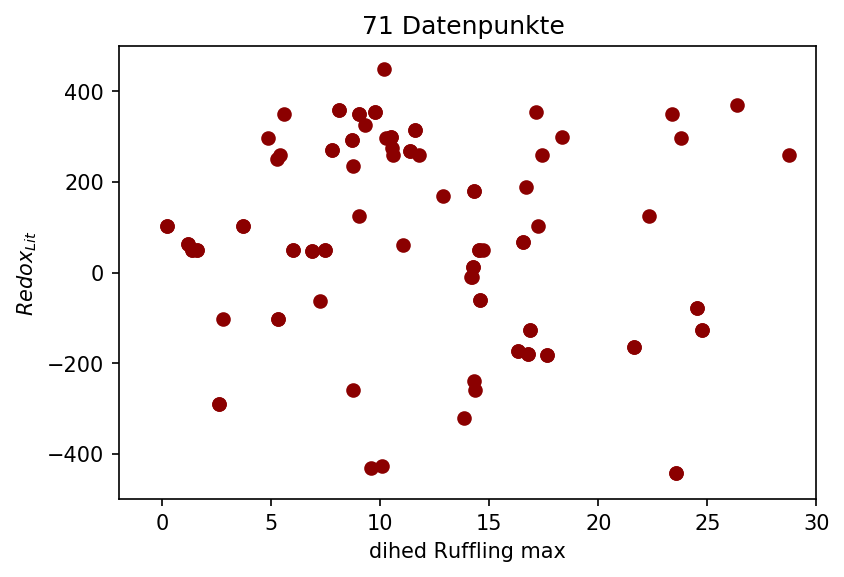

In [89]:
plt.figure(dpi=150)

#plt.scatter(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"],df_mode[df_mode["ruffling_max"]<20]["Em_lit"])
plt.scatter(df_mode["ruffling_max"],df_mode["Em_lit"], c = "darkred")

plt.xlabel("dihed Ruffling max")
plt.ylabel("$Redox_{Lit}$")
plt.title(f"{len(list(df_mode['Em_lit']))} Datenpunkte ")

plt.xlim([-2,30])
plt.ylim([-500,500])
plt.scatter(df_work_distortion["ruffling_max"], df_work_distortion["Em_lit"]  ,c= "darkred")
plt.savefig(f'{plots}falsche_Hoffnung2.png')

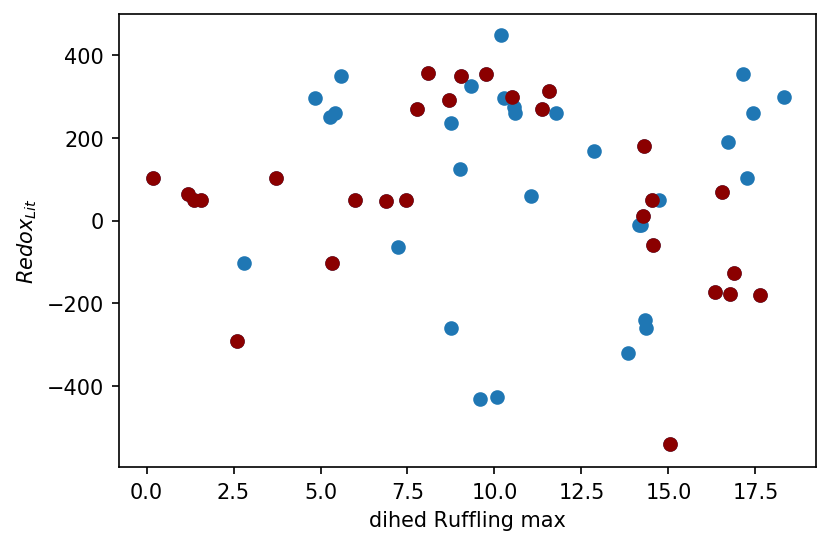

In [90]:
plt.figure(dpi=150)

plt.scatter(df_mode[df_mode["ruffling_max"]<20]["ruffling_max"],df_mode[df_mode["ruffling_max"]<20]["Em_lit"])
#plt.scatter(df_mode["ruffling_max"],df_mode["Em_lit"])

plt.xlabel("dihed Ruffling max")
plt.ylabel("$Redox_{Lit}$")


plt.scatter(df_work_distortion[df_work_distortion["ruffling_max"]<20]["ruffling_max"], df_work_distortion[df_work_distortion["ruffling_max"]<20]["Em_lit"]  ,c= "darkred")

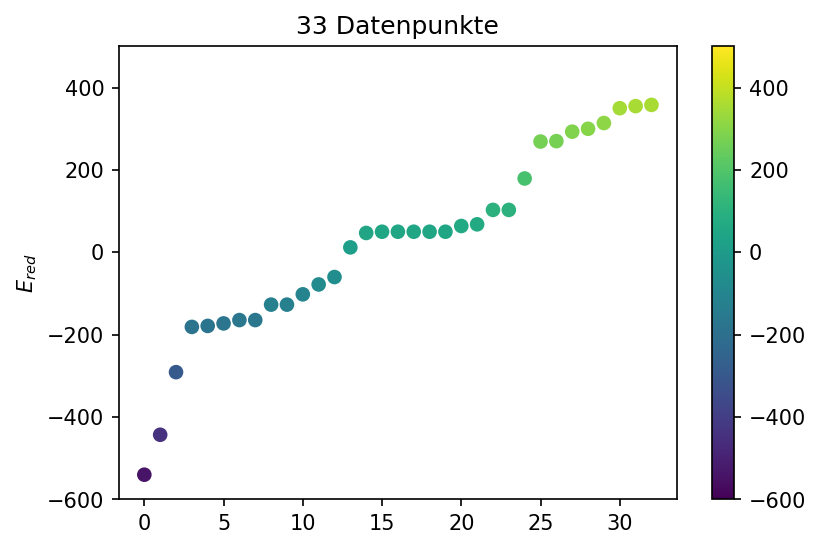

In [91]:
plt.figure(dpi=150)

lis = [i for i in df_work_distortion['Em_lit']]
lis.sort()
plt.ylabel("$E_{red}$")
plt.title(f"{len(lis)} Datenpunkte")
#plt.xlabel("order")
plt.scatter(range(len(lis)), lis,c=lis,vmin = -600, vmax = 500)
plt.ylim([-600,500])
plt.colorbar()#, cmap = "hot")
plt.savefig(f"{plots}order_smal")


-0.11554385151018742


/home/hagen/anaconda3/envs/KLeich/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/home/hagen/anaconda3/envs/KLeich/lib/python3.7/site-packages/pandas/core/series.py:856: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


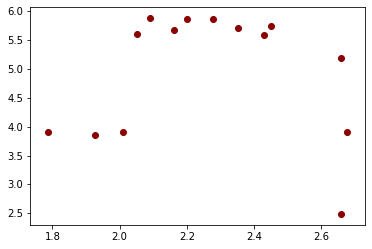

In [92]:
df_poly = df_work_distortion[df_work_distortion["ruffling_max"]<16][df_work_distortion["ruffling_max"]>5]



X = df_poly[["ruffling_mean", "saddling_mean"]]
X = df_poly[["ruffling_mean"]]
Y = df_poly[["Em_lit"]]
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state = 42, test_size = 0.25)




pf = PolynomialFeatures(degree = 2, include_bias = False) # include_bias macht noch einen wert 1 
pf.fit(X_train) # möglicherweise nicht nötig


X_train_transformed = pf.transform(X_train)[:, [0, 1]]
X_test_transformed = pf.transform(X_test)[:, [0, 1]]
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_transformed, y_train)

print(model.score(X_test_transformed, y_test))

plt.scatter(np.log(df_poly["ruffling_max"]), np.log(df_poly["Em_lit"])  ,c= "darkred")



In [93]:
 df_work_distortion["saddling_max_2"] = [180- abs(i) if abs(i)>90 else abs(i) for i in df_work_distortion["saddling_max"]]

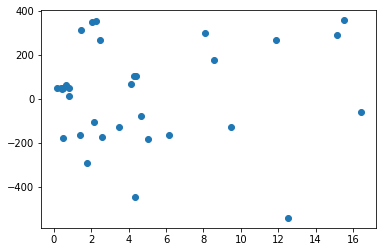

In [94]:
plt.scatter( df_work_distortion["saddling_max_2"],  df_work_distortion["Em_lit"])

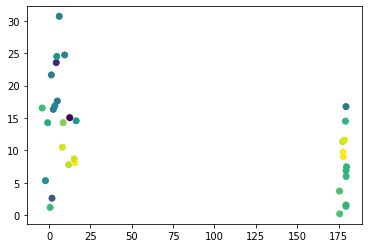

In [95]:
plt.scatter( df_work_distortion["saddling_max"],  df_work_distortion["ruffling_max"], c = df_work_distortion["Em_lit"]  )

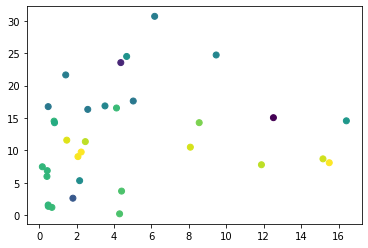

In [96]:
plt.scatter( df_work_distortion["saddling_max_2"],  df_work_distortion["ruffling_max"], c = df_work_distortion["Em_lit"]  )

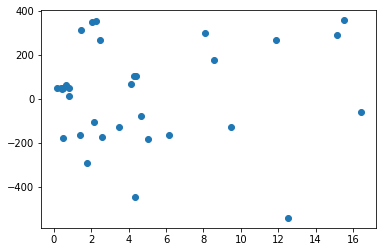

In [97]:
plt.scatter( df_work_distortion["saddling_max_2"],   df_work_distortion["Em_lit"] )

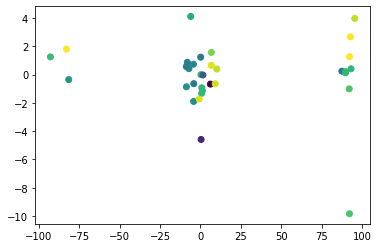

In [98]:
plt.scatter( df_work_distortion["saddling_mean"],  df_work_distortion["ruffling_mean"], c = df_work_distortion["Em_lit"]  )

In [99]:
df_saddling2 = df_saddling.copy()
df_ruffling2 = df_ruffling.copy()

In [100]:
for col in df_saddling2.columns:
    df_saddling2[col] = [180- abs(i) if abs(i)>90 else abs(i) for i in df_saddling2[col]]
    
for col in df_ruffling2.columns:
    df_ruffling2[col] = [180- abs(i) if abs(i)>90 else abs(i) for i in df_ruffling2[col]]

In [101]:
df_work_distortion2 = df_work2.copy()
df_work_distortion2["ruffling_mean"] = df_ruffling2.mean(axis = 1)
df_work_distortion2["ruffling_max"] = df_ruffling2.max(axis = 1)
df_work_distortion2["saddling_mean"] = df_saddling2.mean(axis = 1)
df_work_distortion2["saddling_max"] = df_saddling2.max(axis = 1)

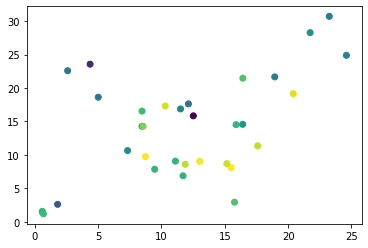

In [102]:
plt.scatter( df_work_distortion2["saddling_max"],  df_work_distortion2["ruffling_max"], c = df_work_distortion2["Em_lit"]  )

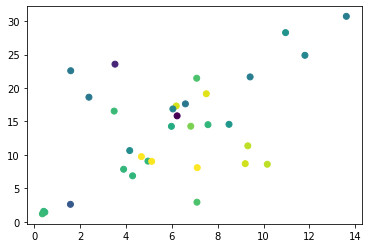

In [103]:
plt.scatter( df_work_distortion2["saddling_mean"],  df_work_distortion2["ruffling_max"], c = df_work_distortion2["Em_lit"]  )

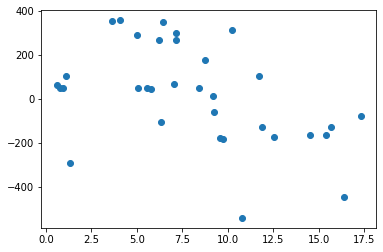

In [104]:
plt.scatter( df_work_distortion2["ruffling_mean"],  df_work_distortion2["Em_lit"]  )

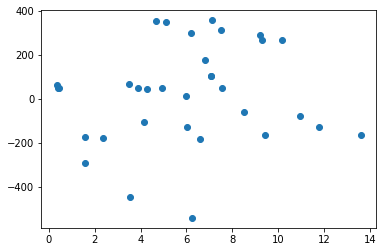

In [105]:
plt.scatter( df_work_distortion2["saddling_mean"],   df_work_distortion2["Em_lit"]  )

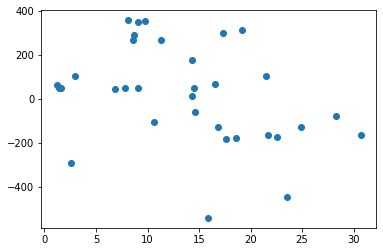

In [106]:
plt.scatter( df_work_distortion2["ruffling_max"],  df_work_distortion2["Em_lit"]  )

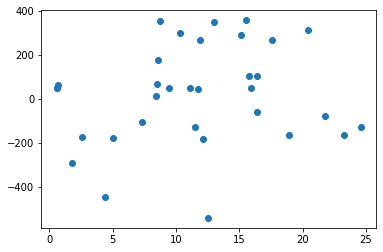

In [107]:
plt.scatter( df_work_distortion2["saddling_max"],  df_work_distortion2["Em_lit"]  )

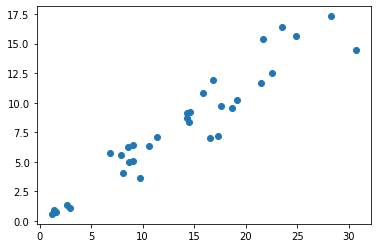

In [108]:
plt.scatter( df_work_distortion2["ruffling_max"],  df_work_distortion2["ruffling_mean"]  )

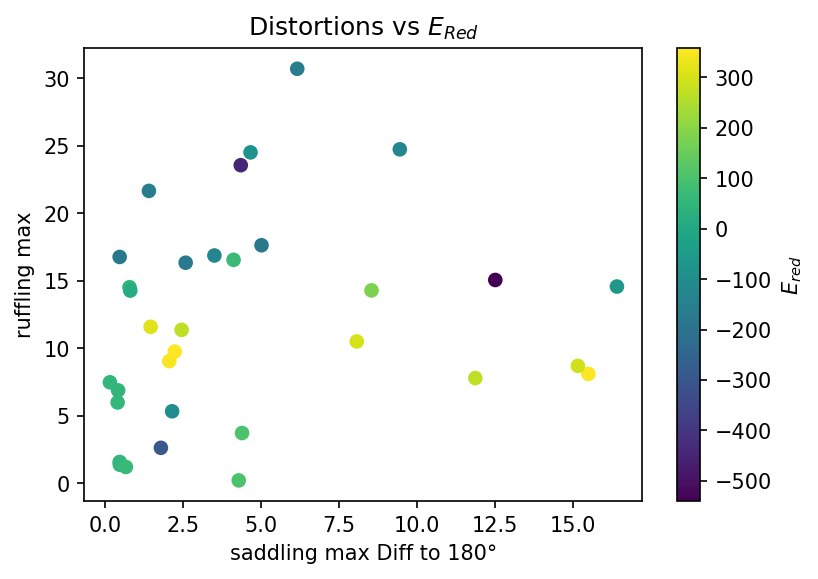

In [109]:
plt.figure(dpi = 150)
df_work_distortion[["saddling_max","ruffling_max","Em_lit"]]
plt.xlabel("saddling max Diff to 180°")
plt.ylabel("ruffling max")
plt.title("Distortions vs $E_{Red}$")
#plt.label("Em_red")
plt.scatter( df_work_distortion["saddling_max_2"],  df_work_distortion["ruffling_max"], c = df_work_distortion["Em_lit"]  )


plt.colorbar(label ="$E_{red}$")
plt.savefig(f"{plots}saddling2.png")

In [110]:
PCA()

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [111]:
def pca_show(df_work2, **kwargs):
    default_value_order=[1,2,0]
    order = kwargs.pop('order', default_value_order)    
    
    default_value_n_components=6
    num_of_componentes = kwargs.pop('num_comp', default_value_n_components) 
    if num_of_componentes>df_work2.shape[1]:
        num_of_componentes=df_work2.shape[1]
        
    
    
    best_n=3
    best_par = kwargs.pop('best_par', default_value_n_components)     
    if best_par> num_of_componentes:
        best_par== num_of_componentes
        
    default_value_whiten = False
    whiten_ = kwargs.pop('whiten', default_value_whiten)
    
    hk1,hk2,hk3=order   #x,y,c
    df_work2 = df_work2[[n for n in df_work2.columns if not n in [i for i in df_work2.dtypes[df_work2.dtypes==object].index]]]
    X = df_work2.values
    s = StandardScaler()
    X = s.fit_transform(X)
    p = PCA(n_components = num_of_componentes, whiten = whiten_)
    p.fit(X)
    X_transformed = p.transform(X)
    X_transformed_filtered = X_transformed
    #print(p.explained_variance_ratio_)
    #print("\n Sum:",sum(p.explained_variance_ratio_))
    print("noise variance: ",p.noise_variance_)
    print( "number of componentes: ", num_of_componentes) 
    #print(f"\n the best parameter of the first {best_par} components")
   # for i in range(best_par):
    #    print(p.components_[i].max())
    if(False):
        print(p.components_[0].max())
        print(p.components_[1].max())
        print(p.components_[2].max())
        plt.scatter(X_transformed_filtered[:, hk1], X_transformed_filtered[:, hk2] , c = X_transformed_filtered[:, hk3] )

        plt.xlabel(str(hk1))
        plt.xlabel(f"HK{hk1+1}")
        plt.ylabel(str(hk2))
        plt.ylabel(f"HK{hk2+1}")

        plt.title(f"Color = HK{hk3+1}")
        #plt.show()
   # p,cols  =pca_show(df_work2,num_comp=20)
    #return pd.DataFrame(p.components_,columns = cols)
    cols = list(df_work2.columns)
    #print("noise_variance_: ",p.noise_variance_)
    return pd.DataFrame(p.components_,columns = cols)

In [112]:
def best_components(df, **kwargs):
        
    default_value_n_components=6
    num_of_componentes = kwargs.pop('num_comp', default_value_n_components) 
    
    default_value_min_Em_lit = 0.1
    min_Em_lit = kwargs.pop('min_Em_lit', default_value_min_Em_lit)

    default_value_min_PC = 0.15
    min_PC = kwargs.pop('min_PC', default_value_min_PC)
    
    
    
    df  =pca_show(df,num_comp=num_of_componentes, whiten = True) #,num_comp=32)
    df_abs = df.abs()
 #   emv = list(df_abs["Em_lit"])
  #  emv.sort(reverse=True)
   # for i,v in enumerate(emv[:5]):
    #    print(v,"  ",sum(emv[:i+1]))
    bo = df[df_abs["Em_lit"]> min_Em_lit ].index

    list_of_df = []

    for b in bo:

        numname = [(np.round(v,4),i) for i,v in zip(df.loc[b].index,df.loc[b]) if abs(v)>min_PC]
        names = [i[1] for i in numname] 
        nums = [i[0] for i in numname] 
        list_of_df.append(pd.DataFrame({df.loc[b]["Em_lit"]:nums}, index= names))

    if len(list_of_df)>1:
        a = []
        for i in list_of_df:
            a = a+ list( i.index)
        a = list(set(a))


        list_of_best = [i for i in a if all([i in j.index for j in list_of_df]) ]
        Matrix = [[ld.loc[[lb]].iloc[0,0] for ld in list_of_df] for lb in list_of_best]
        #print(pd.DataFrame(Matrix, index = list_of_best, columns = [df.loc[b]["Em_lit"] for b in bo]) )
        df_bo = pd.DataFrame(Matrix, index = list_of_best, columns = [(df.loc[b]["Em_lit"]) for b in bo])
        df_bo["mean"] = df_bo.mean(axis = 1)
        list_of_df.append( df_bo)
        return list_of_df

In [113]:
#a = Hemetype([i[:4]  for i in  df_mode.index])

In [114]:
#a.save_csv()

## dwork2

In [115]:
best_components(df_work2)[-1]

noise variance:  0.19467078037890995
number of componentes:  6


,-0.18286386299211427,-0.23556559390109696,mean
chem_pot_1_nbo,-0.2511,0.1728,-0.03915
homo_5_nbo,-0.1909,-0.2290,-0.20995
Em_lit,-0.1829,-0.2356,-0.20925
chem_pot_2_nbo,-0.2074,0.2537,0.02315
lumo_2_nbo,-0.1956,0.1815,-0.00705


## HemeB


In [116]:
best_components(df_work_HemeB, min_Em_lit=0.1,min_PC=0.1)[-1]

noise variance:  0.2360823735040667
number of componentes:  6


,0.1897633518446436,0.10385320890250227,-0.3583437033269121,mean
chem_pot_1_nbo,0.2272,0.1244,0.1115,0.154367
Em_lit,0.1898,0.1039,-0.3583,-0.021533
diff_1_nbo,0.2072,-0.1187,-0.2191,-0.043533


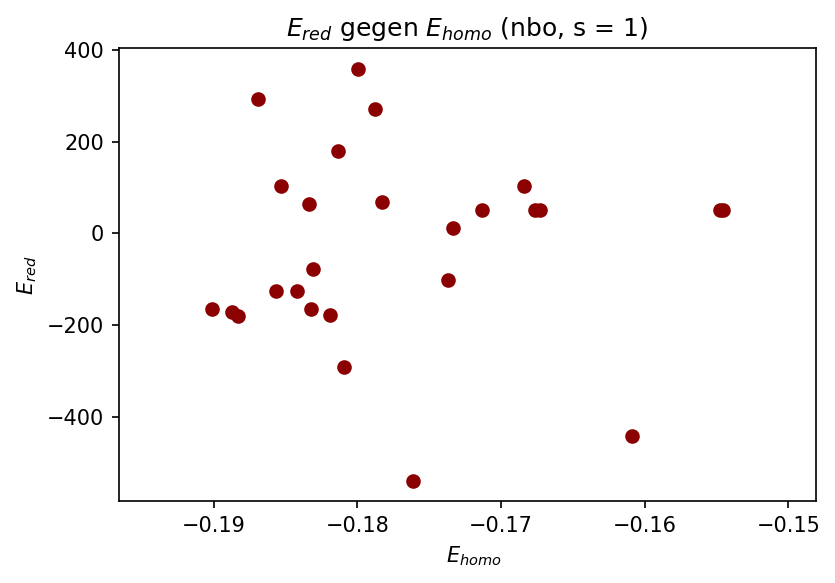

In [117]:
plt.figure(dpi=150)

plt.scatter(df_work_HemeB["homo_1_nbo"], df_work_HemeB["Em_lit"], color = "darkred")

plt.title("$\Delta E_{homo-lumo}$ for all values")
plt.title("$E_{red}$ gegen $E_{homo}$ (nbo, s = 1) ")
plt.xlabel(r' $\ E_{homo}$')
plt.ylabel('$E_{red}$')
#plt.savefig('/home/hagen/Masterarbeit/Arbeit/MasterThesis/img/results/all_homo.png')
plt.savefig(f'{plots}all_homo.png')



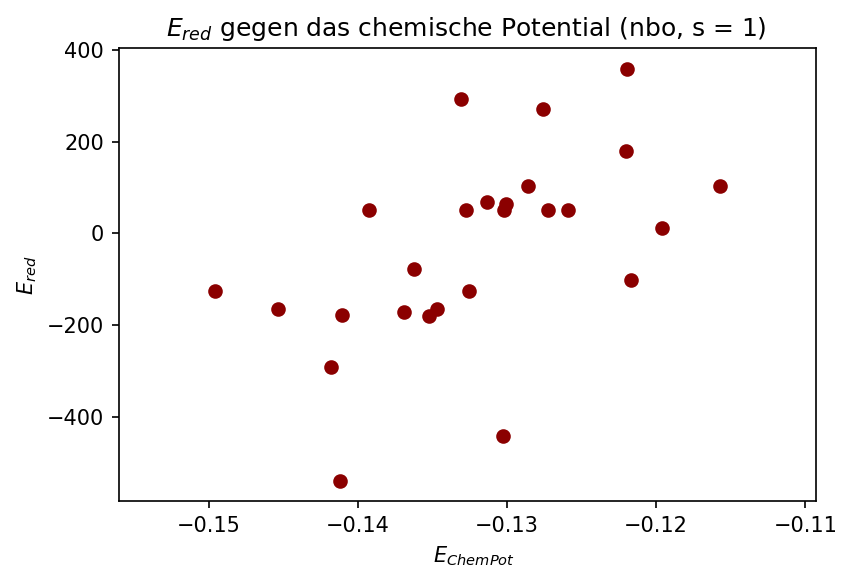

In [118]:

plt.figure(dpi=150)

plt.scatter(df_work_HemeB["chem_pot_1_nbo"], df_work_HemeB["Em_lit"], color = "darkred")

plt.title("$\Delta E_{homo-lumo}$ for all values")
plt.title("$E_{red}$ gegen das chemische Potential (nbo, s = 1) ")
plt.xlabel(r' $\ E_{ChemPot}$')
plt.ylabel('$E_{red}$')
#plt.savefig('/home/hagen/Masterarbeit/Arbeit/MasterThesis/img/results/all_chemPot.png')
plt.savefig(f'{plots}all_chemPot.png')



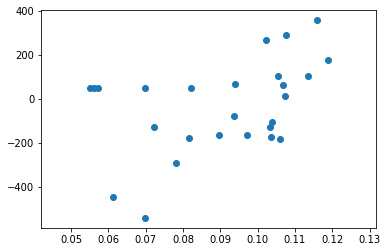

In [119]:
plt.scatter(df_work_HemeB["diff_1_nbo"], df_work_HemeB["Em_lit"])

In [120]:
df_work_HemeB_2  = df_work_HemeB[df_work_HemeB["Em_lit"]>-400]

In [121]:
best_components(df_work_HemeB_2, min_Em_lit=0.08,min_PC=0.08)[-1]

noise variance:  0.23096056356628628
number of componentes:  6


,0.19128410750733488,0.11743557643885788,0.15544316029195687,0.1457486271382024,mean
dipole_2_nbo,-0.0868,-0.2033,0.2222,0.1021,0.00855
Em_lit,0.1913,0.1174,0.1554,0.1457,0.15245


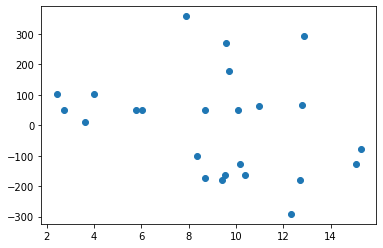

In [122]:
plt.scatter(df_work_HemeB_2["dipole_2_nbo"], df_work_HemeB_2["Em_lit"])

# HIS

In [123]:
best_components(df_work_His, min_Em_lit=0.1,min_PC=0.12)[-1] 

noise variance:  0.40666910719515303
number of componentes:  6


,0.17847335077056878,-0.16117219519995338,-0.22755124716323022,0.2730352764668848,0.14046331747703075,mean
homo_1_nbo,0.1255,-0.2179,0.1983,-0.2019,-0.1981,-0.05882
Em_lit,0.1785,-0.1612,-0.2276,0.2730,0.1405,0.04064


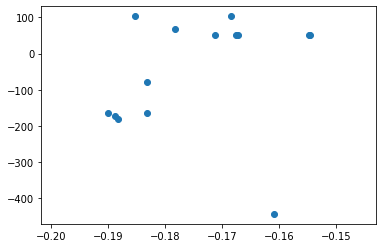

In [124]:
plt.scatter(df_work_His["homo_1_nbo"], df_work_His["Em_lit"])

## Distortion

In [125]:
best_components(df_work_distortion, min_Em_lit=0.1,min_PC=0.15)[-1]

noise variance:  0.3064005172573474
number of componentes:  6


,-0.18726790234885488,-0.12570648651338096,-0.17502862453812132,mean
ruffling_max,0.1688,0.1657,0.1649,0.166467
homo_5_nbo,-0.1826,0.2932,-0.2582,-0.049200


## Distortion HemeB

In [126]:
best_components(df_work_distortion_HemeB, min_Em_lit=0.1,min_PC=0.15)[-1]

noise variance:  0.33189841432361755
number of componentes:  6


,0.18957764736443236,0.10292577883183854,-0.38039925354386983,mean
diff_1_nbo,0.2011,-0.2708,-0.2417,-0.103800
diff_2_nbo,0.2087,-0.1562,-0.2104,-0.052633


## Distortion only

In [127]:
best_components(df_work_distortion_only, min_Em_lit=0.1,min_PC=0.15)[-1]

noise variance:  0.0
number of componentes:  5


,0.392995871110934,-0.5457261854390508,-0.3921393489711097,-0.5670149681070804,-0.2691801120940063,mean
Em_lit,0.393,-0.5457,-0.3921,-0.567,-0.2692,-0.2762


## Distortion only Heme B

In [128]:
best_components(df_work_distortion_only_HemeB, min_Em_lit=0.2,min_PC=0.10)[-1]

noise variance:  0.0
number of componentes:  5


,0.22100675838562422,-0.7383939295003447,0.2831996981162896,-0.44798901912727385,-0.35360173550640783,mean
Em_lit,0.221,-0.7384,0.2832,-0.448,-0.3536,-0.20716


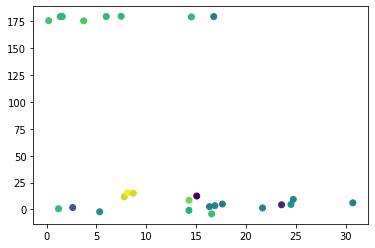

In [129]:
plt.scatter(df_work_distortion_only_HemeB["ruffling_max"], df_work_distortion_only_HemeB["saddling_max"], c = list(df_work_distortion_only_HemeB["Em_lit"]))

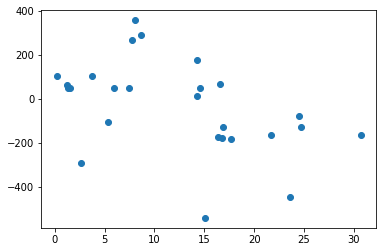

In [130]:
plt.scatter(df_work_distortion_only_HemeB["ruffling_max"] , list(df_work_distortion_only_HemeB["Em_lit"]))

In [131]:
df_work_distortion_only_HemeB

,Em_lit,ruffling_mean,ruffling_max,saddling_mean,saddling_max
pdb,,,,,
1AW3,-102.0,-1.899056,5.321410,-4.161817,-2.160916
1FHF,-443.0,-4.589434,23.562327,0.446406,4.360793
1CCC,-78.0,-0.866376,24.512677,-8.623236,4.673526
1A6G,50.0,-1.325632,7.471468,0.805118,179.832818
1A6K,50.0,-1.139059,14.519887,1.232260,179.205138
1CCE,-127.0,0.416999,24.739251,-7.074727,9.457818
1EBT,103.0,-1.011155,0.198867,92.142623,175.704042
1CCK,-178.7,0.236900,16.761481,87.616776,179.520179
1DRM,68.0,1.248518,16.548711,-92.815087,-4.130716


In [132]:
#[ld.loc[[lb]].iloc[0,0] for ld in list_of_df] 

In [133]:
ld.loc[[lb]]

NameError: name 'ld' is not defined

def funktion(dataframe): 
    return datframe
        0.22
    emv 0.22
    homo 0.5
    lumo 0.4

In [ ]:
[[ld.loc[lb] for ld in list_of_df] for lb in list_of_best]

In [ ]:
[i for i in a if all([i in j.index for j in list_of_df]) ]

In [ ]:
i = "chem_pot_2_nbo" 

In [ ]:
for i in df_10pc.columns:
    if df_10pc[i].loc["sum"]>0.1:
        print(df_10pc[i].loc["sum"], i)

In [ ]:
df_work3 = df_work2[[i  for i in df_10pc.columns if df_10pc[i].loc["sum"]>0.1]]

In [ ]:
df  =pca_show(df_work3,num_comp=3)

In [ ]:
df

In [ ]:
pd.concat()

In [ ]:
dicti= {}
for a,b in zip( df_10pc.columns,[df_10pc[col].sum(axis=0) for col in df_10pc.columns]):
    dicti[a] =b
df_10pc = pd.concat([df_10pc,pd.DataFrame(dicti,index=["sum"])    ])

In [ ]:
df_10pc

In [ ]:
df  =pca_show(df_work2[["Em_lit",]],num_comp=32)

In [ ]:
for c in df_work2:
    if True  in df_work[c].isna().value_counts().index:
        print(c)

In [ ]:
df_work2.dtypes[df_work2.dtypes==object]

In [ ]:
df_work2

In [ ]:
print(df_work2.dtypes.value_counts())

In [ ]:
pca_show(df_work2[df_work2["Hemetype"]=="Heme B"],num_comp =3,order = [1,2,0],best_par=3)

In [ ]:
pca_show(df_work2[df_work2["Hemetype"]=="Heme B"])

In [ ]:
pca_show(df_work2)

In [ ]:
print(p.components_[0].max(),  df_work2.columns[np.where(p.components_[0] == p.components_[0].max())[0][0] ]  )
print(p.components_[1].max(),df_work2.columns[ np.where(p.components_[1] == p.components_[1].max())[0][0]]   )
print(p.components_[2].max(), df_work2.columns[np.where(p.components_[2] == p.components_[2].max())[0][0] ]  )
print(p.components_[3].max(), df_work2.columns[np.where(p.components_[3] == p.components_[3].max())[0][0]  ] )
print(p.components_[4].max(),df_work2.columns[ np.where(p.components_[4] == p.components_[4].max())[0][0]  ] )
print(p.components_[5].max(), df_work2.columns[np.where(p.components_[5] == p.components_[5].max())[0][0]  ] )

In [ ]:
df_work2.columns[133]

In [ ]:
######df_calc

In [ ]:
_dihedral

Read in csv-files and change axes so that the PDB entries are a) non duplicate and b) the index column of the table so that we can clearly identify each heme by it's originating protein structure

In [ ]:
dfex_lit

In [ ]:
pd.read_csv("tables/Hemetypes.csv")

In [ ]:
#_4spin = pd.read_csv("4spin.csv")
_dihedral = pd.read_csv("tables/Dihedral.csv")
_nbo_singulet = pd.read_csv("nbo_singulet.csv")
_4spin = _4spin.drop("Unnamed: 0", axis=1)
_4spin = _4spin.set_index("PDB")
spin = _4spin
_dihedral = _dihedral.rename(columns={"index": "PDB"})
_dihedral["PDB"] = _dihedral["PDB"]#.str.upper()
_dihedral = _dihedral.set_index("PDB")
dihe = _dihedral
_nbo_singulet = _nbo_singulet.drop("Unnamed: 0", axis=1)
_nbo_singulet["PDB"] = _nbo_singulet["PDB"].str.upper()
_nbo_singulet = _nbo_singulet.set_index("PDB")
nbo = _nbo_singulet

Compare column names as a list to see which information is redundant, and can be used to potentially join the tables. Compare shapes of the resulting subtables with only the information from the inner join (columns that both tables contain) and add the lines that are omitted from the original tables because the calculations did compute succesfully in chloroform solution. 

In [ ]:
nbo_cols = list(nbo.columns)
dihe_cols = list(dihe.columns)
spin_cols = list(spin.columns)
insec1 = list(set(nbo_cols).intersection(spin_cols))
sub_nbo, sub_spin, i = pd.DataFrame(), pd.DataFrame(), 0
for col_name in insec1:
    sub_nbo.insert(loc=i, column=col_name, value=nbo[col_name])
    sub_spin.insert(loc=i, column=col_name, value=spin[col_name])
    i+=1
#print("sub_nbo shape: "+str(sub_nbo.shape))
#print("sub_spin shape: "+str(sub_spin.shape))
#here, add the lines that are missing, so both tables have the same format

In [ ]:
sub_nbo

Have a look at the distributions of the measured dihedral angles in the porphyrin ring

In [ ]:
#print("  \n\n\n\n\n ")
print("          {}---{}					".format("C3_NW","C3_NO"))
print("            /      \ ")
print("        {}      {}					".format("C1_NW","C1_NO"))
print("       /    \      /  \ ")
print("   {}        {}     {}					".format("WC2N","N_N","NC2O"))
print("     |          |        | 					")
print("  __{}       |        {}_					".format("C1_WN","C1_ON"))
print("{}    \      |      /      {}					".format("C3_WN","C3_ON"))
print("|        {}----{}----{}      |  					".format("NW","Fe","NO"))
print("{}__  /      |      \    _{}					".format("C3_WS","C3_OS"))
print("    {}       |       {}					".format("C1_WS","C1_OS"))
print("     |          |         | 					")
print("     {}      {}      {}					".format("SC2W","N_S","OC2S"))
print("       \      /   \    /  ")
print("        {}       {}					".format("C1_SW","C1_SO"))
print("            \     /")
print("          {}---{}						".format("C3_SW","C3_SO"))

In [ ]:
saddling = [["C1_SW", "N_S" ,"N_N","C1_NW"],["C1_SO", "N_S","N_N", "C1_NO"],["C1_WS", "NW", "NO" ,"C1_OS"],["C1_WN", "NW", "NO" ,"C1_ON"]]
ruffling = [["C3_SW", "C1_SW", "C1_WS", "C3_WS"],["C3_SO", "C1_SO", "C1_OS", "C3_OS"],["C3_WN", "C1_WN", "C1_NW", "C3_NW"],["C3_NO", "C1_NO", "C1_ON", "C3_ON"]]

In [ ]:
if not True or not True:
    print("i")

In [ ]:
dihe.head()
#dihe.max()
#dihe.min()
#dihe

In [ ]:
class angles():
    def __init__(self):
        return

    def transform_angles(angle):
        """
        angles.transform_angles transforms all angles lower than -30 by adding 360°.
        """
        if angle <= -30.0:
            angle=360+angle
        return angle

    def histplot_all(data):
        """ 
        angles.histplot_all() plots all columns of a pd.DataFrame containing e.g. dihedral angles into one plot, adds the kde. Beforehand, angles are transformed 
        with angles.transform_angles().
        """
        if not isinstance(data, pd.DataFrame):
            raise ValueError("data is not a pd.DataFrame.")
        dihe_trans = dihe.applymap(angles.transform_angles)
        fig = plt.figure()
        ax = fig.add_subplot()
        ax = sns.histplot(data=dihe_trans, binrange=[-30,210], bins=180, kde=True, alpha=0.4)
        ax.set_title(f"Dihedral angles")
        ax.set_xlabel(f"Angle [°]")
        fig.savefig(f"heme/histplot_dihe_all.png")
        return

    def histplot(data, column_name):
        """ 
        angles.histplot() plots a single column of a pd.DataFrame containing angles as a histogram. 
        """
        fig = plt.figure()
        ax = fig.add_subplot()
        ax = sns.histplot(data, binrange=[-30,210], bins=180, kde=True, alpha=0.4)
        ax.set_title(f"Dihedral angle {column_name}")
        ax.set_xlabel(f"{column_name} [°]")
        fig.savefig(f"heme/histplot_{column_name}.png")
        return

    def single_histplots(data):
        """ 
        angles.single_histplots() loops over all columns in the pd.DataFrame given, creating histograms with angles.histplot(). Beforehand, 
        angles are transformed with angles.transform_angles().
        """
        if not isinstance(data, pd.DataFrame):
            raise ValueError("data is not a pd.DataFrame.")
        data = data.applymap(angles.transform_angles)
        for column in data.columns:
            angles.histplot(data=data[column], column_name=column)
        return

    def histplot_grid(data):
        """ 
        angles.histplot_grid() takes a pd.DataFrame and creates a plot of all the columns, and arranges them in a grid. Beforehand, 
        angles are transformed with angles.transform_angles().
        """
        if not isinstance(data, pd.DataFrame):
            raise ValueError("data is not a pd.DataFrame.")
        data = data.applymap(angles.transform_angles)
        #nrows, ncols = (data.shape[1]//3)+1, 3
        #fig = plt.subplots(ncols=ncols, nrows=nrows)
        plt.figure(figsize=(15, 12))
        plt.subplots_adjust(hspace=0.7)
        plt.suptitle("Dihedral Angles of Heme-Porphyrin Ring in Protein Structures", fontsize=16, y=0.95)

        # loop through the length of tickers and keep track of index
        for n, column in enumerate(dihe.columns):
            # add a new subplot iteratively
            ax = plt.subplot(5, 3, n + 1)

            # filter df and plot ticker on the new subplot axis
            dihe[column].hist(ax=ax, bins=60)

            # chart formatting
            ax.set_title(column.upper())
            ax.set_xlim([-20, 220])
            #ax.get_legend().remove()
            ax.set_xlabel("Angle [°]")
            ax.set_ylabel("Count")
        plt.savefig(f"heme/histplot_grid.png")
        return

In [ ]:
#angles.histplot_all(data=dihe)
#angles.single_histplots(data=dihe)
angles.histplot_grid(data=dihe)

In [ ]:
#dist = pd.DataFrame(np.ones([37,14]))
#fig = plt.figure()
#ax = fig.add_subplot(projection="polar")
#c = ax.scatter(dihe.applymap(angles.transform_angles), dist)
#This makes no sense, why are all the data points shown somewhere they're not?